# Classification de page Internet basée sur les travauxde Nicholas Kushmerick

## Contexte

Le jeu de données du challenge provient de l’ ́etude [Learning to remove Internet advertisements réalisée par Nicholas Kushmerick](http://www.sc.ehu.es/ccwbayes/docencia/mmcc/docs/lecturas-clasificacion/abstracts-resumir/kushmerick99learning.pdf) réalisée en 1997. Le chercheur cherchait à entrainer un modèle servant à alimenter une solution de blocage de bannières publicitaires. Le modèle devait être en mesure d'identifier si une image présente était une banière publicitaire ou non sur une base de variables extraites du code html de la page où sont hébergée les images.  


L’ensemble des donnees de son étude a été menée sur 3279 images dont 2821 de la classe "nonad." et 458 de la classe "ad.".

Il y a 1558 variables toutes binaire sauf 3 continues X1, X2 ,X3. X1 correspond à la hauteur, X2 à la largeur et X3 au ratio entre les deux mesures. Les données binaires sont séparées en 5 groupes : captionfeatures, altfeatures, Ubasefeatures, Utargetfeatures et Uimgfeatures:
- captionfeatures: légende des images
- altfeatures: balise alt des images
- Ubasefeatures: url de la page hébergeant l'image
- Utargetfeatures: url de la page de destination lors du clic sur l'image
- Uimgfeature: url de l'image

Chaque variable binaire est calculée sur la présence ou non d'un bigramme (combinaison de deux termes) répétée au moins à dix reprises sur le jeu de données de l'étude.

# Importation des données

In [40]:
import warnings
warnings.filterwarnings('ignore')
import IPython.display
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use("seaborn")

print("Dix premières lignes du jeu d'entraînement")
data = pd.read_csv("data_train.csv", sep = "\t")
data.head()

Dix premières lignes du jeu d'entraînement


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X1550,X1551,X1552,X1553,X1554,X1555,X1556,X1557,X1558,outcome
1,33.0,230.0,6.9696,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
2,60.0,468.0,7.8000,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
3,60.0,468.0,7.8000,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
4,59.0,460.0,7.7966,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
5,60.0,234.0,3.9000,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.


Nous commençons par vérifier si les données ont les mêmes dimensions que celles des travaux de Nicholas Kushmerick

In [41]:
print(f"Le jeu d'entraînement contient {data.shape[0]} observations et {data.shape[1]} variables")

Le jeu d'entraînement contient 2459 observations et 1559 variables


Il semble, selon la différence du nombre d'observations mises à disposition que les données fournies lors du challenge ne correspondent pas ou seulement en partie à celles des travaux Nicholas Kushmerick.

Vérifions à présent les types de variables.

In [42]:
data.dtypes

X1         float64
X2         float64
X3         float64
X4         float64
X5           int64
            ...   
X1555        int64
X1556        int64
X1557        int64
X1558        int64
outcome     object
Length: 1559, dtype: object

À l'image des travaux de Nicholas Kushmerick, hormis les variables X1, X2, et X3 qui sont quantitatives continues, toutes les autres sont qualitatives binaires.

Affichons les indicateurs statistiques des différentes variables.

In [43]:
data.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X1549,X1550,X1551,X1552,X1553,X1554,X1555,X1556,X1557,X1558
count,1806.000000,1809.000000,1801.000000,2446.000000,2459.00000,2459.000000,2459.000000,2459.00000,2459.000000,2459.000000,...,2459.00000,2459.000000,2459.00000,2459.000000,2459.000000,2459.000000,2459.000000,2459.000000,2459.000000,2459.000000
mean,64.223145,155.238806,3.822937,0.770237,0.00366,0.013013,0.005693,0.00366,0.005287,0.013013,...,0.00610,0.004880,0.00366,0.002033,0.003253,0.006913,0.013013,0.013013,0.011387,0.001220
std,55.242397,129.404394,5.583711,0.420766,0.06040,0.113355,0.075255,0.06040,0.072532,0.113355,...,0.07788,0.069701,0.06040,0.045056,0.056957,0.082876,0.113355,0.113355,0.106121,0.034914
min,2.000000,1.000000,0.001500,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.000000,82.000000,1.043400,1.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,51.000000,110.000000,2.086900,1.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,84.750000,184.000000,5.333300,1.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,640.000000,640.000000,60.000000,1.000000,1.00000,1.000000,1.000000,1.00000,1.000000,1.000000,...,1.00000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Nous constatons sur X1 et X3 ainsi que dans une moindre mesure sur X2 ont un faible équart interquartile. 

Afin de comprendre la distribution des varibales continues nous réalisons l'histogrammes et la boîte à moustaches de chacune d'elles.

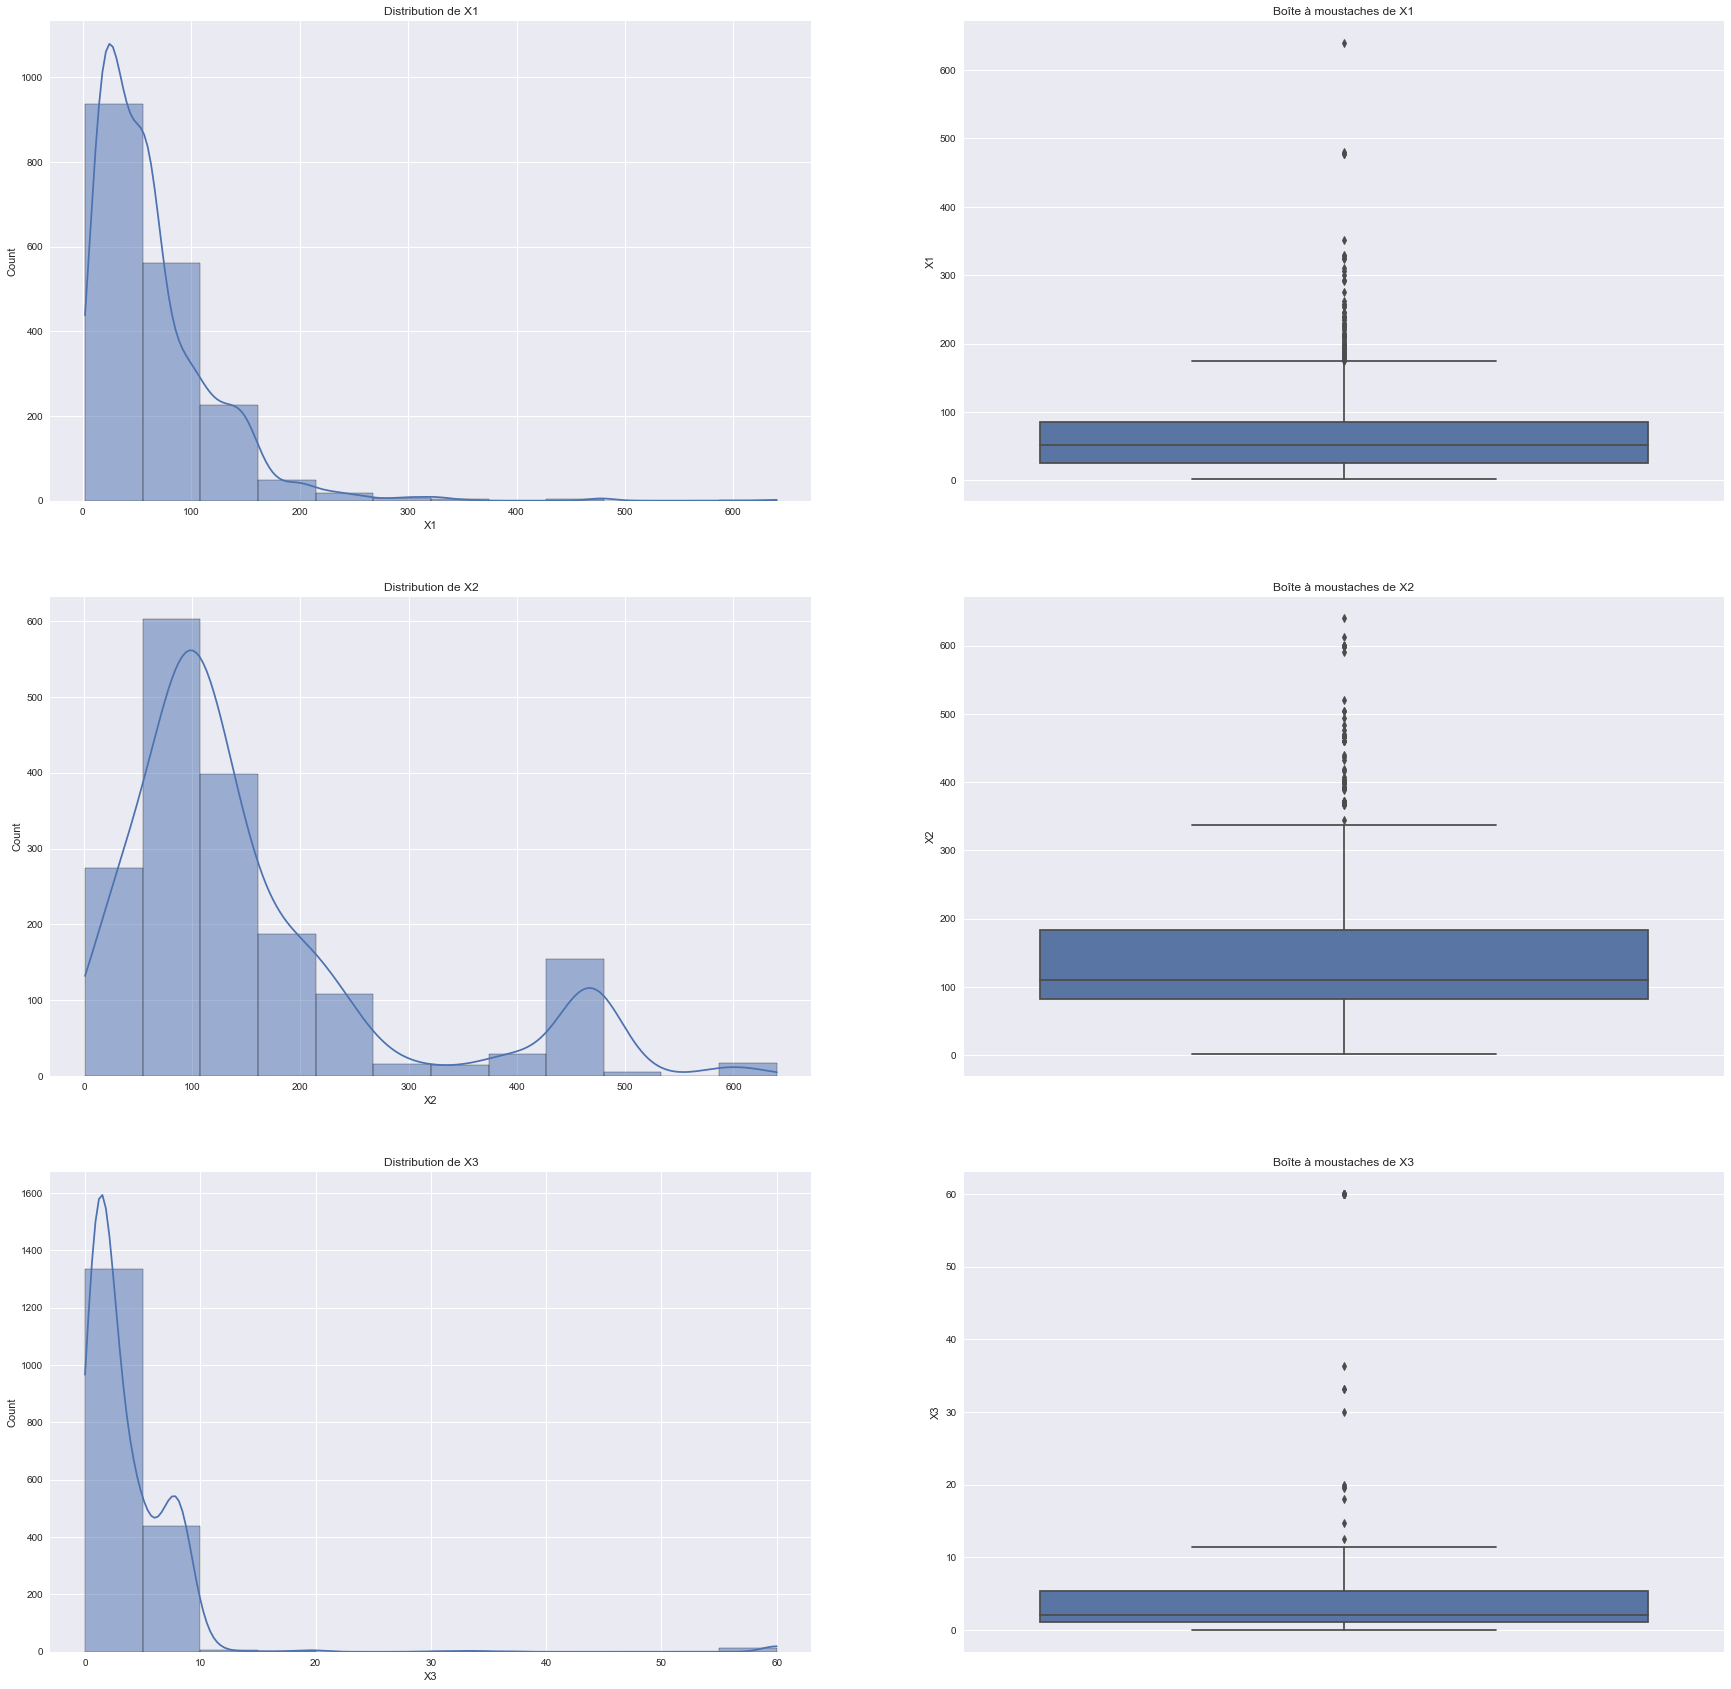

In [44]:
bins = 'sturges'
fig, axes = plt.subplots(ncols=2, nrows=3, figsize=(30,30))

sns.histplot(ax=axes[0,0], data=data, x="X1", bins=bins, kde=True)
axes[0,0].set_title("Distribution de X1")

sns.boxplot(ax=axes[0,1], data=data, y='X1')
axes[0,1].set_title("Boîte à moustaches de X1")

sns.histplot(ax=axes[1,0], data=data, x="X2", bins=bins, kde=True)
axes[1,0].set_title("Distribution de X2")

sns.boxplot(ax=axes[1,1], data=data, y='X2')
axes[1,1].set_title("Boîte à moustaches de X2")

sns.histplot(ax=axes[2,0], data=data, x="X3", bins=bins, kde=True)
axes[2,0].set_title("Distribution de X3")

sns.boxplot(ax=axes[2,1], data=data, y='X3')
axes[2,1].set_title("Boîte à moustaches de X3")

fig.show()

Nous constatons des valeurs atypiques hautes. La présence de ces dernières risquent d'être pénalisantes pour les modèles de la famille de regressions qui ne sont pas robustes à ce type de valeurs. De plus, sans même faire de tests statistiques, les distributions ne semblent pas normales, ce qui peut également s'avérer problématique sur cette famille de modèles.

Vérifions çà présent la répartition des modalités de la variable réponse outcome.

In [46]:
print(f" Pourcentage de données dans la classe nonad. : {data[data['outcome']== 'nonad.'].shape[0] / data.shape[0] * 100:.2f}%")
print(f" Pourcentage de données dans la classe ad. : {data[data['outcome']== 'ad.'].shape[0] / data.shape[0] * 100:.2f}%")

 Pourcentage de données dans la classe nonad. : 85.56%
 Pourcentage de données dans la classe ad. : 14.44%


Nous constatons que les deux classes sont largement déséquilibrées, ce qui aura deux conséquences pour la suite des travaux:
- Le partitionnement devra être réalisé en stratifant sur la variable outcome. En effet, vu la taille du jeu de données, essayer de sous échantilloner la classe ad. reduirait trop significativement le nombre d'observations. La stratification permettra de reproduire la répartition des classes dans le partitionnement.
- Les modèles de regression risquent de donner des résultats moins bons que ceux basés sur des arbres de décision. En effet, les modèles de régression sont moins robustes dans ce cas alors que les arbres ne sont pas pénalisés par le phénomène.

Vérifions à présent la répartition des valeurs atypiques de X1, X2 et X3 par classe de la variable réponse.

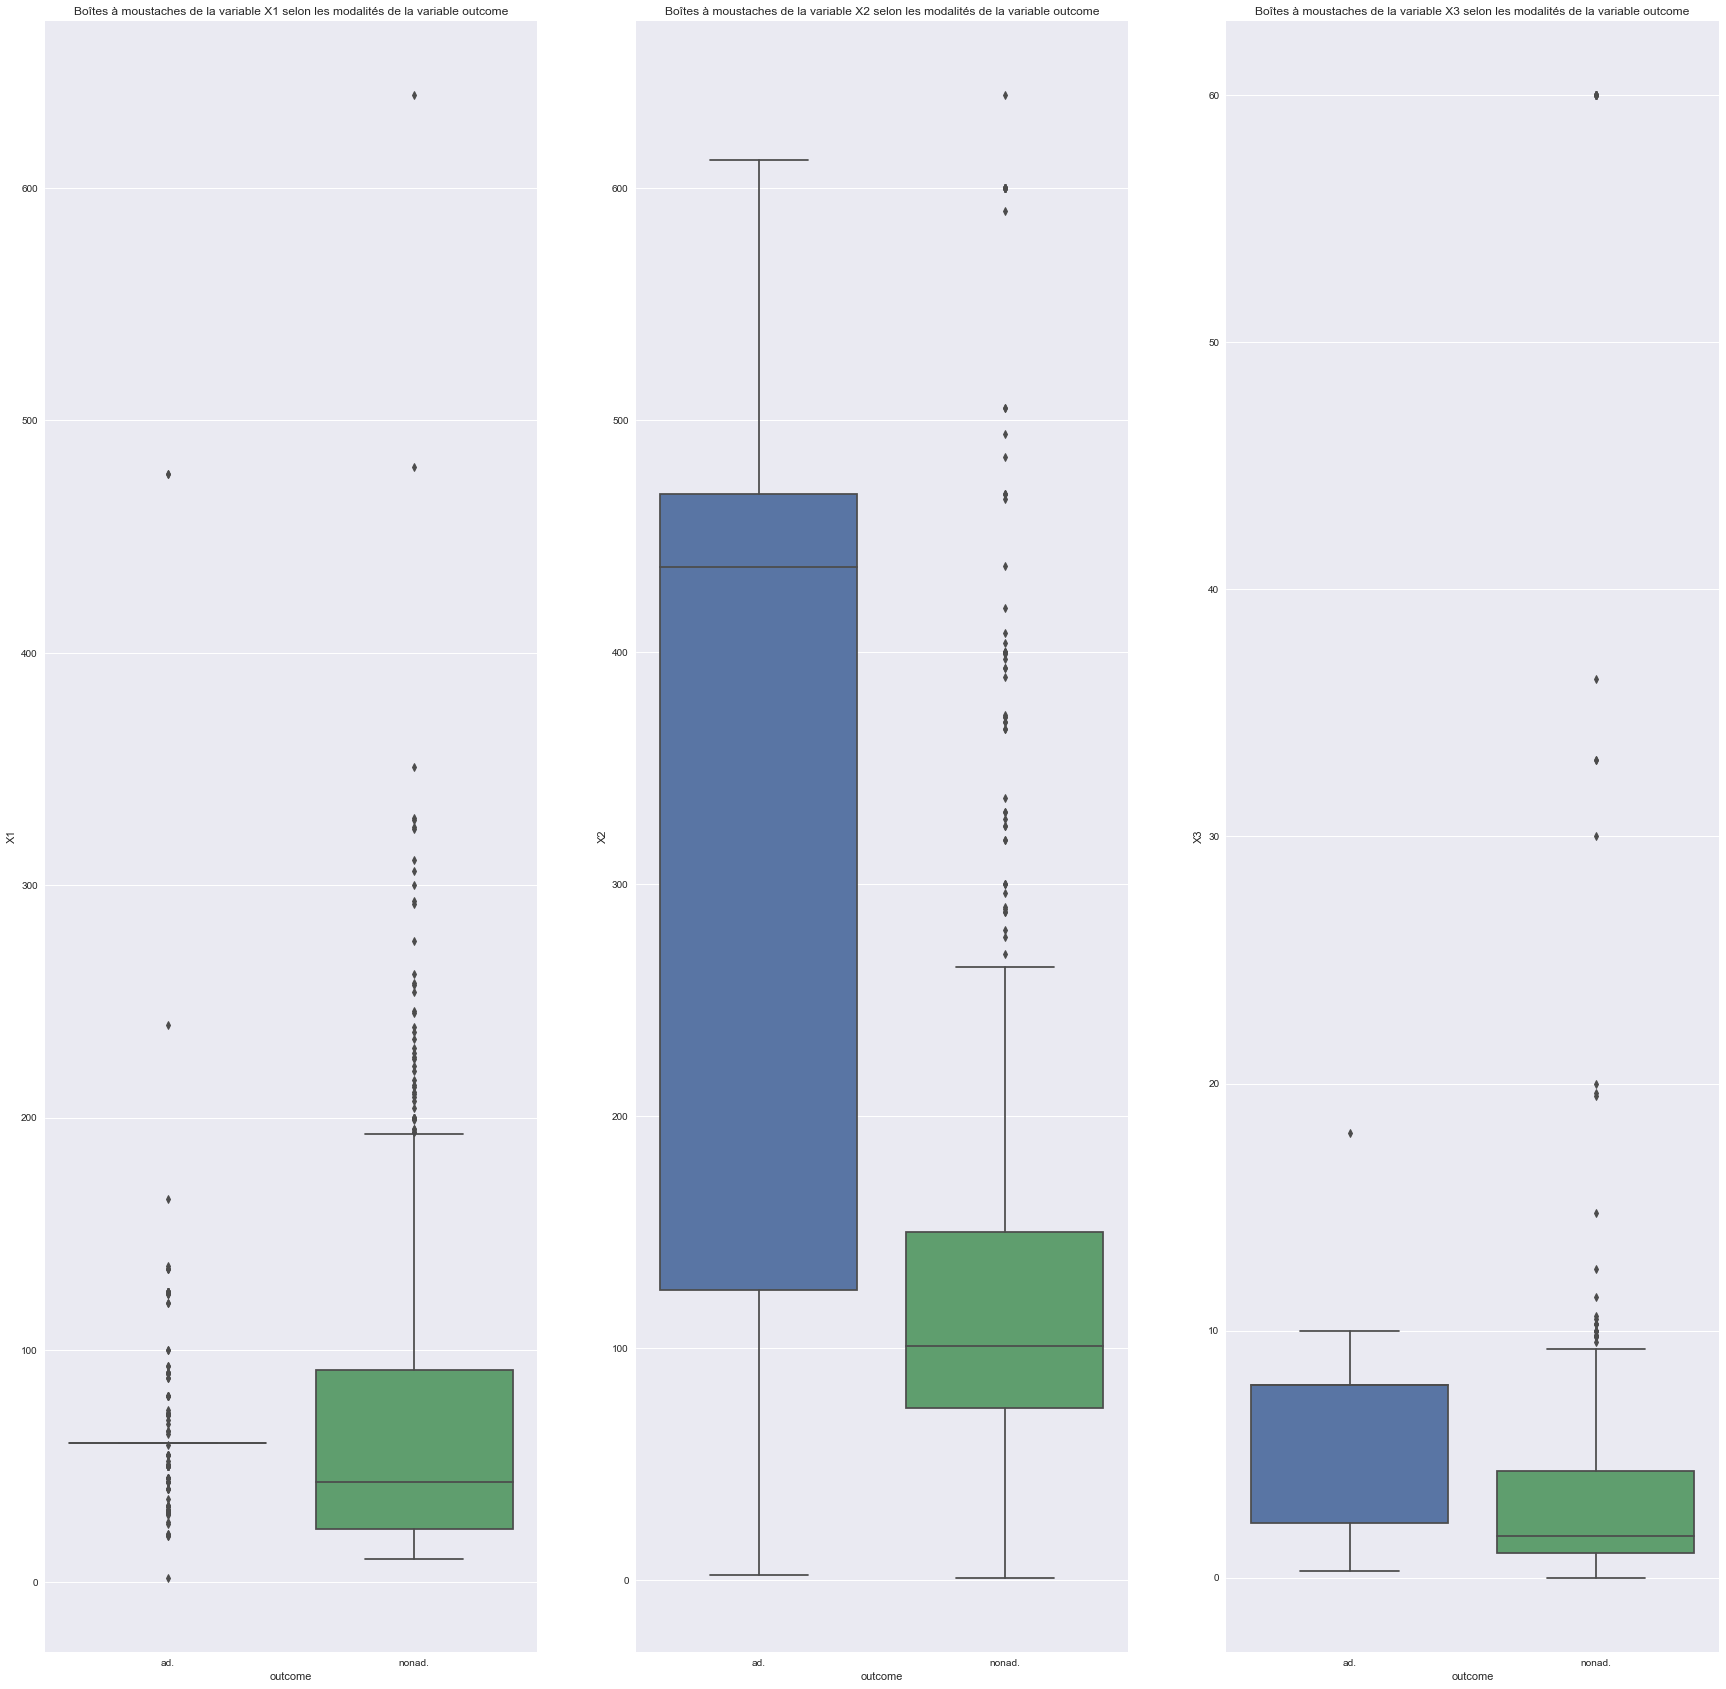

In [47]:
bins = 'sturges'
fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(30,30))

sns.boxplot(ax=axes[0], data=data, x='outcome', y='X1')
axes[0].set_title("Boîtes à moustaches de la variable X1 selon les modalités de la variable outcome")

sns.boxplot(ax=axes[1], data=data, x='outcome', y='X2')
axes[1].set_title("Boîtes à moustaches de la variable X2 selon les modalités de la variable outcome")

sns.boxplot(ax=axes[2], data=data, x='outcome', y='X3')
axes[2].set_title("Boîtes à moustaches de la variable X3 selon les modalités de la variable outcome")

fig.show()

Nous constatons sur X1 un nombre de valeurs atypiques basses et hautes élevés pour la modalité ad. De plus l'interval interquartile se limite à la médiane. Sur X2 la classe ad. n'a aucune valeur atypique et elle n'en a qu'une sur x3. 
Le phénomè sur X1 pourrait être pénalisant pour les modèles de regression linéaire.

Nos remarques sur le déséquilibre des classes est à relativiser au vu du nombre iportant de variables du jeu de données.

## Imputation des valeurs manquantes

Nous commençons par vérifier le taux de complétion des variables

In [48]:
rows = data.shape[0]

def test_completion(data):
    """
    Compute sorted completion rate for each variable of the argument in a descending order
    
    Args:
        data(dataset) : A dataset with variables
        
    Returns:
        A specific dataframe with completion rate for each variable. 
        Schema :
            Index : Variable names
            pourcentage d'observations : completion rate
    """
    var_dict = {}
    
    for col in data.columns:
        var_dict[col] = {}
        var_dict[col]['taux_completion'] = round(data[data[col].notna()==1].shape[0]/rows*100,2)
        var_dict[col]['valeurs_manquantes'] = data[data[col].isna()==1].shape[0]
        
    return pd.DataFrame.from_dict(data=var_dict, orient="index").sort_values(by="taux_completion", ascending=False)

print("Affichage du taux de complétion des 10 variables dont le taux est le plus faible.")
test_completion(data).tail(10)

Affichage du taux de complétion des 10 variables dont le taux est le plus faible.


,taux_completion,valeurs_manquantes
X520,100.00,0
X519,100.00,0
X518,100.00,0
X517,100.00,0
X516,100.00,0
X515,100.00,0
X4,99.47,13
X2,73.57,650
X1,73.44,653
X3,73.24,658


Seuls X1, X2, X3 et X4 ont des valeurs manquantes. Pour rappel, selon la synthèse des travaux de Nicholas Kushmerick:
- X1, X2,  indiquent que les dimensions des images présentes dans le code de la page
- X3 indique le ration entre X2 et X1
-  X4 indique si les liens associés aux images pointent sur le même site que celui où est hébergée l'image.

Ces données sont issues de l'encodage HTML réalisé par les responsables des sites internet. Le fait qu'elles soient renseignées ou non n'est ni lié à une variable étudie ni a une varible absente. Nous pouvons donc en déduire que nous sommes en présence d'un mécanisme MCAR. 

Nous allons tester une imputation simple par la moyenne et des imputations par KNN avec K=1, K=2, K=3, K=5

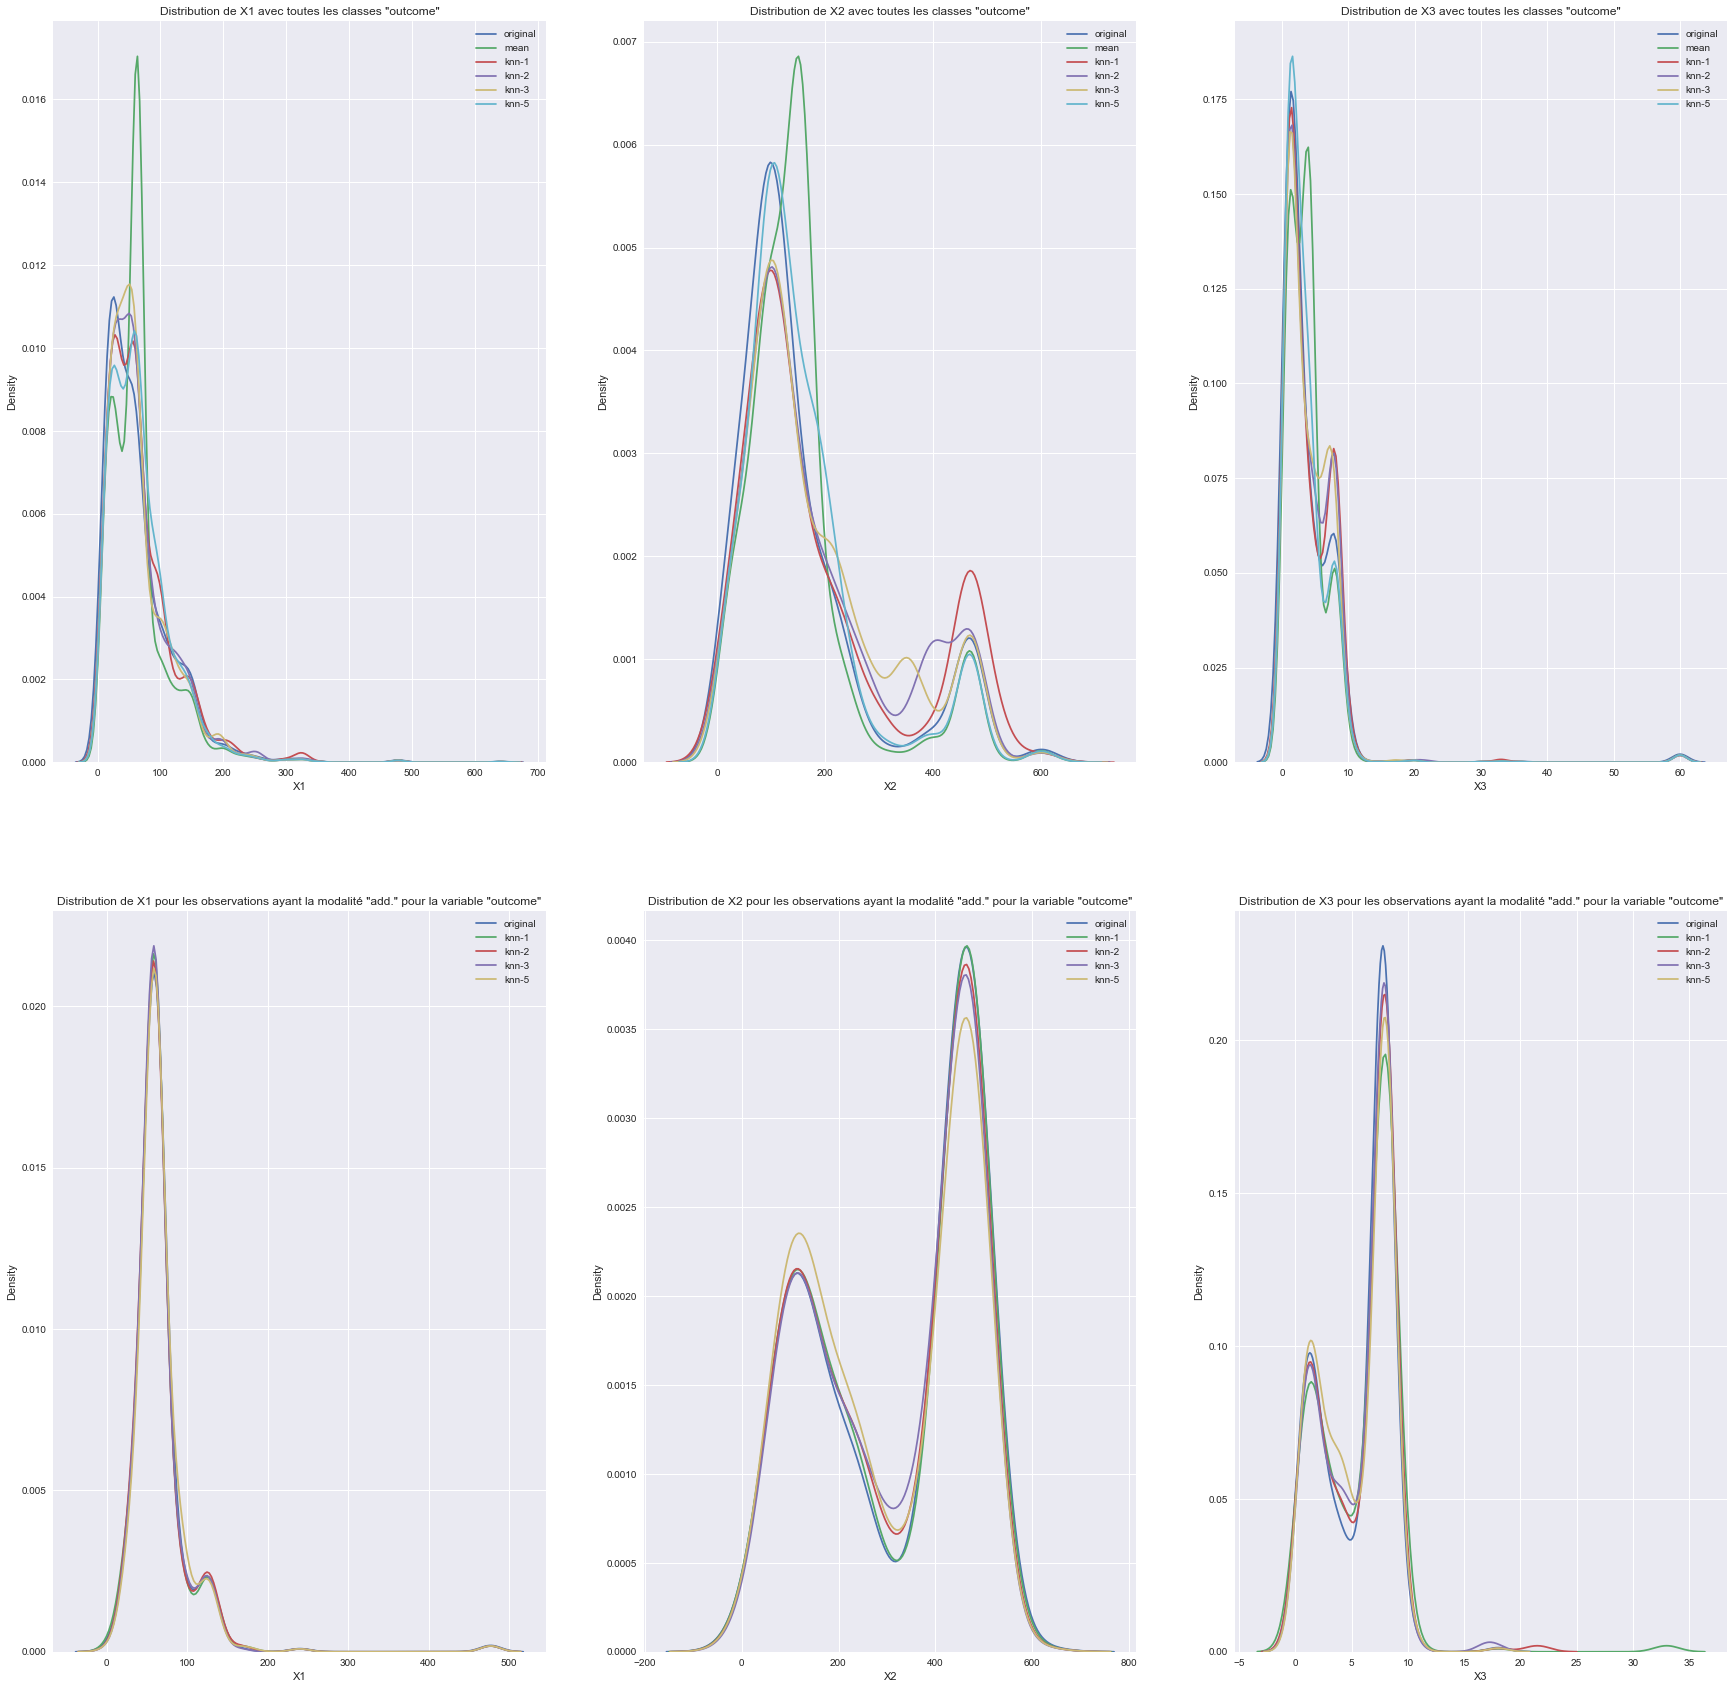

In [49]:
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

bins = "sturges"
data_copy = data.select_dtypes(['int','float']).copy()
simple_imputer = SimpleImputer(strategy="mean")
knn_imputer_1 = KNNImputer(weights="distance", n_neighbors=1,copy=False)
knn_imputer_2 = KNNImputer(weights="distance", n_neighbors=2,copy=False)
knn_imputer_3 =  KNNImputer(weights="distance", n_neighbors=3,copy=False)
knn_imputer_5 =  KNNImputer(weights="distance", n_neighbors=5,copy=False)


simple_imputed = pd.DataFrame(np.round_(simple_imputer.fit_transform(data_copy)),columns=data_copy.columns, index=data_copy.index )
knn_imputed_1 = pd.DataFrame(np.round_(knn_imputer_1.fit_transform(data_copy)),columns=data_copy.columns, index=data_copy.index)
knn_imputed_2 = pd.DataFrame(np.round_(knn_imputer_2.fit_transform(data_copy)),columns=data_copy.columns, index=data_copy.index)
knn_imputed_3 = pd.DataFrame(np.round_(knn_imputer_3.fit_transform(data_copy)),columns=data_copy.columns, index=data_copy.index)
knn_imputed_5 = pd.DataFrame(np.round_(knn_imputer_5.fit_transform(data_copy)),columns=data_copy.columns, index=data_copy.index)

knn_imputed_1['outcome'] = data['outcome'] 
simple_imputed['outcome'] = data['outcome']
knn_imputed_1['outcome'] = data['outcome']
knn_imputed_2['outcome'] = data['outcome']
knn_imputed_3['outcome'] = data['outcome']
knn_imputed_5['outcome'] = data['outcome']

fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(30,30))

sns.kdeplot(ax=axes[0,0], data=data, x="X1", label="original")
sns.kdeplot(ax=axes[0,0], data=simple_imputed, x="X1", label="mean")
sns.kdeplot(ax=axes[0,0], data=knn_imputed_1, x="X1", label="knn-1")
sns.kdeplot(ax=axes[0,0], data=knn_imputed_2, x="X1", label="knn-2")
sns.kdeplot(ax=axes[0,0], data=knn_imputed_3, x="X1", label="knn-3")
sns.kdeplot(ax=axes[0,0], data=knn_imputed_5, x="X1", label="knn-5")
axes[0,0].legend()
axes[0,0].set_title('Distribution de X1 avec toutes les classes "outcome"')


sns.kdeplot(ax=axes[0,1], data=data, x="X2", label="original")
sns.kdeplot(ax=axes[0,1], data=simple_imputed, x="X2", label="mean")
sns.kdeplot(ax=axes[0,1], data=knn_imputed_1, x="X2", label="knn-1")
sns.kdeplot(ax=axes[0,1], data=knn_imputed_2, x="X2", label="knn-2")
sns.kdeplot(ax=axes[0,1], data=knn_imputed_3, x="X2", label="knn-3")
sns.kdeplot(ax=axes[0,1], data=knn_imputed_5, x="X2", label="knn-5")
axes[0,1].legend()
axes[0,1].set_title('Distribution de X2 avec toutes les classes "outcome"')

sns.kdeplot(ax=axes[0,2], data=data, x="X3", label="original")
sns.kdeplot(ax=axes[0,2], data=simple_imputed, x="X3", label="mean")
sns.kdeplot(ax=axes[0,2], data=knn_imputed_1, x="X3", label="knn-1")
sns.kdeplot(ax=axes[0,2], data=knn_imputed_2, x="X3", label="knn-2")
sns.kdeplot(ax=axes[0,2], data=knn_imputed_3, x="X3", label="knn-3")
sns.kdeplot(ax=axes[0,2], data=knn_imputed_5, x="X3", label="knn-5")
axes[0,2].legend()
axes[0,2].set_title('Distribution de X3 avec toutes les classes "outcome"')

sns.kdeplot(ax=axes[1,0], data=data[data['outcome']== 'ad.'], x="X1", label="original")
sns.kdeplot(ax=axes[1,0], data=simple_imputed[simple_imputed['outcome']== 'nad.'], x="X1", label="mean")
sns.kdeplot(ax=axes[1,0], data=knn_imputed_1[knn_imputed_1['outcome']== 'ad.'], x="X1", label="knn-1")
sns.kdeplot(ax=axes[1,0], data=knn_imputed_2[knn_imputed_2['outcome']== 'ad.'], x="X1", label="knn-2")
sns.kdeplot(ax=axes[1,0], data=knn_imputed_3[knn_imputed_3['outcome']== 'ad.'], x="X1", label="knn-3")
sns.kdeplot(ax=axes[1,0], data=knn_imputed_5[knn_imputed_5['outcome']== 'ad.'], x="X1", label="knn-5")
axes[1,0].legend()
axes[1,0].set_title('Distribution de X1 pour les observations ayant la modalité "add." pour la variable "outcome"')

sns.kdeplot(ax=axes[1,1], data=data[data['outcome']== 'ad.'], x="X2", label="original")
sns.kdeplot(ax=axes[1,1], data=simple_imputed[simple_imputed['outcome']== 'nad.'], x="X2", label="mean")
sns.kdeplot(ax=axes[1,1], data=knn_imputed_1[knn_imputed_1['outcome']== 'ad.'], x="X2", label="knn-1")
sns.kdeplot(ax=axes[1,1], data=knn_imputed_2[knn_imputed_2['outcome']== 'ad.'], x="X2", label="knn-2")
sns.kdeplot(ax=axes[1,1], data=knn_imputed_3[knn_imputed_3['outcome']== 'ad.'], x="X2", label="knn-3")
sns.kdeplot(ax=axes[1,1], data=knn_imputed_5[knn_imputed_5['outcome']== 'ad.'], x="X2", label="knn-5")
axes[1,1].legend()
axes[1,1].set_title('Distribution de X2 pour les observations ayant la modalité "add." pour la variable "outcome"')

sns.kdeplot(ax=axes[1,2], data=data[data['outcome']== 'ad.'], x="X3", label="original")
sns.kdeplot(ax=axes[1,2], data=simple_imputed[simple_imputed['outcome']== 'nad.'], x="X3", label="mean")
sns.kdeplot(ax=axes[1,2], data=knn_imputed_1[knn_imputed_1['outcome']== 'ad.'], x="X3", label="knn-1")
sns.kdeplot(ax=axes[1,2], data=knn_imputed_2[knn_imputed_2['outcome']== 'ad.'], x="X3", label="knn-2")
sns.kdeplot(ax=axes[1,2], data=knn_imputed_3[knn_imputed_3['outcome']== 'ad.'], x="X3", label="knn-3")
sns.kdeplot(ax=axes[1,2], data=knn_imputed_5[knn_imputed_5['outcome']== 'ad.'], x="X3", label="knn-5")
axes[1,2].legend()
axes[1,2].set_title('Distribution de X3 pour les observations ayant la modalité "add." pour la variable "outcome"')


plt.show()

En observanat l'intégralité des observations, nous constatons que l'imputation simple par la moyenne déforme la distribution. Nous constatons, par contre, que pour les différentes imputations par KNN (avc k=1, k=2, k=3, k=5) la distribution reste assez proche de la distribution originale. Les imputations avec k=3 et k=5 offrent tout de même de meilleurs résultats. Pour les départager, nous observons uniquement la classe minoritaire des observation annotée "add.". Nous constatons que l'imupation par KNN avec k=3 offre de meilleurs résultats.

Nous décidons donc de garder l'imputation par KNN avec k=3.

Par définition la variable X3 est un ratio entre X2 et X1. L'imputation par KNN, procédant variable par variable, il est possible que l'imputation ne respecte plus le ratio. Observons le phénomène. 

In [50]:
data['X1_imputed'] = knn_imputed_3['X1']
data['X2_imputed'] = knn_imputed_3['X2']
data['X3_imputed'] = knn_imputed_3['X3']

data['X3_by_computation'] = np.round_((data['X2_imputed'] / data['X1_imputed']),0)


differences = data[data['X3_imputed']!=data['X3_by_computation']].loc[:,['X3_imputed', 'X3_by_computation']]

print(f"Nombre d'observations où X3 imputé diffère de X3 calculé: {differences.shape[0]}")
print(f"Pourcentage d'observations où X3 par imputation et X3 calculé diffèrent: {round((differences.shape[0]/data.shape[0])*100,2)}%")

Nombre d'observations où X3 imputé diffère de X3 calculé: 223
Pourcentage d'observations où X3 par imputation et X3 calculé diffèrent: 9.07%


On observe bien une différence sur un peu plus de 9% des observation.
Nous décidons donc de garder les imputation pour X1 et X2 alors que nous gardons le calcul de ratio pour X3.

In [51]:
originals = data[['X1', 'X2', 'X3']]
data['X1'] = data ['X1_imputed']
data['X2'] = data ['X2_imputed']
data['X3'] = data['X3_by_computation']
data.drop(columns=['X1_imputed', 'X2_imputed', 'X3_imputed', 'X3_by_computation'], inplace=True)

Observons maintenant l'imputation de X4 par KNN  avec les même vameurs de K. 

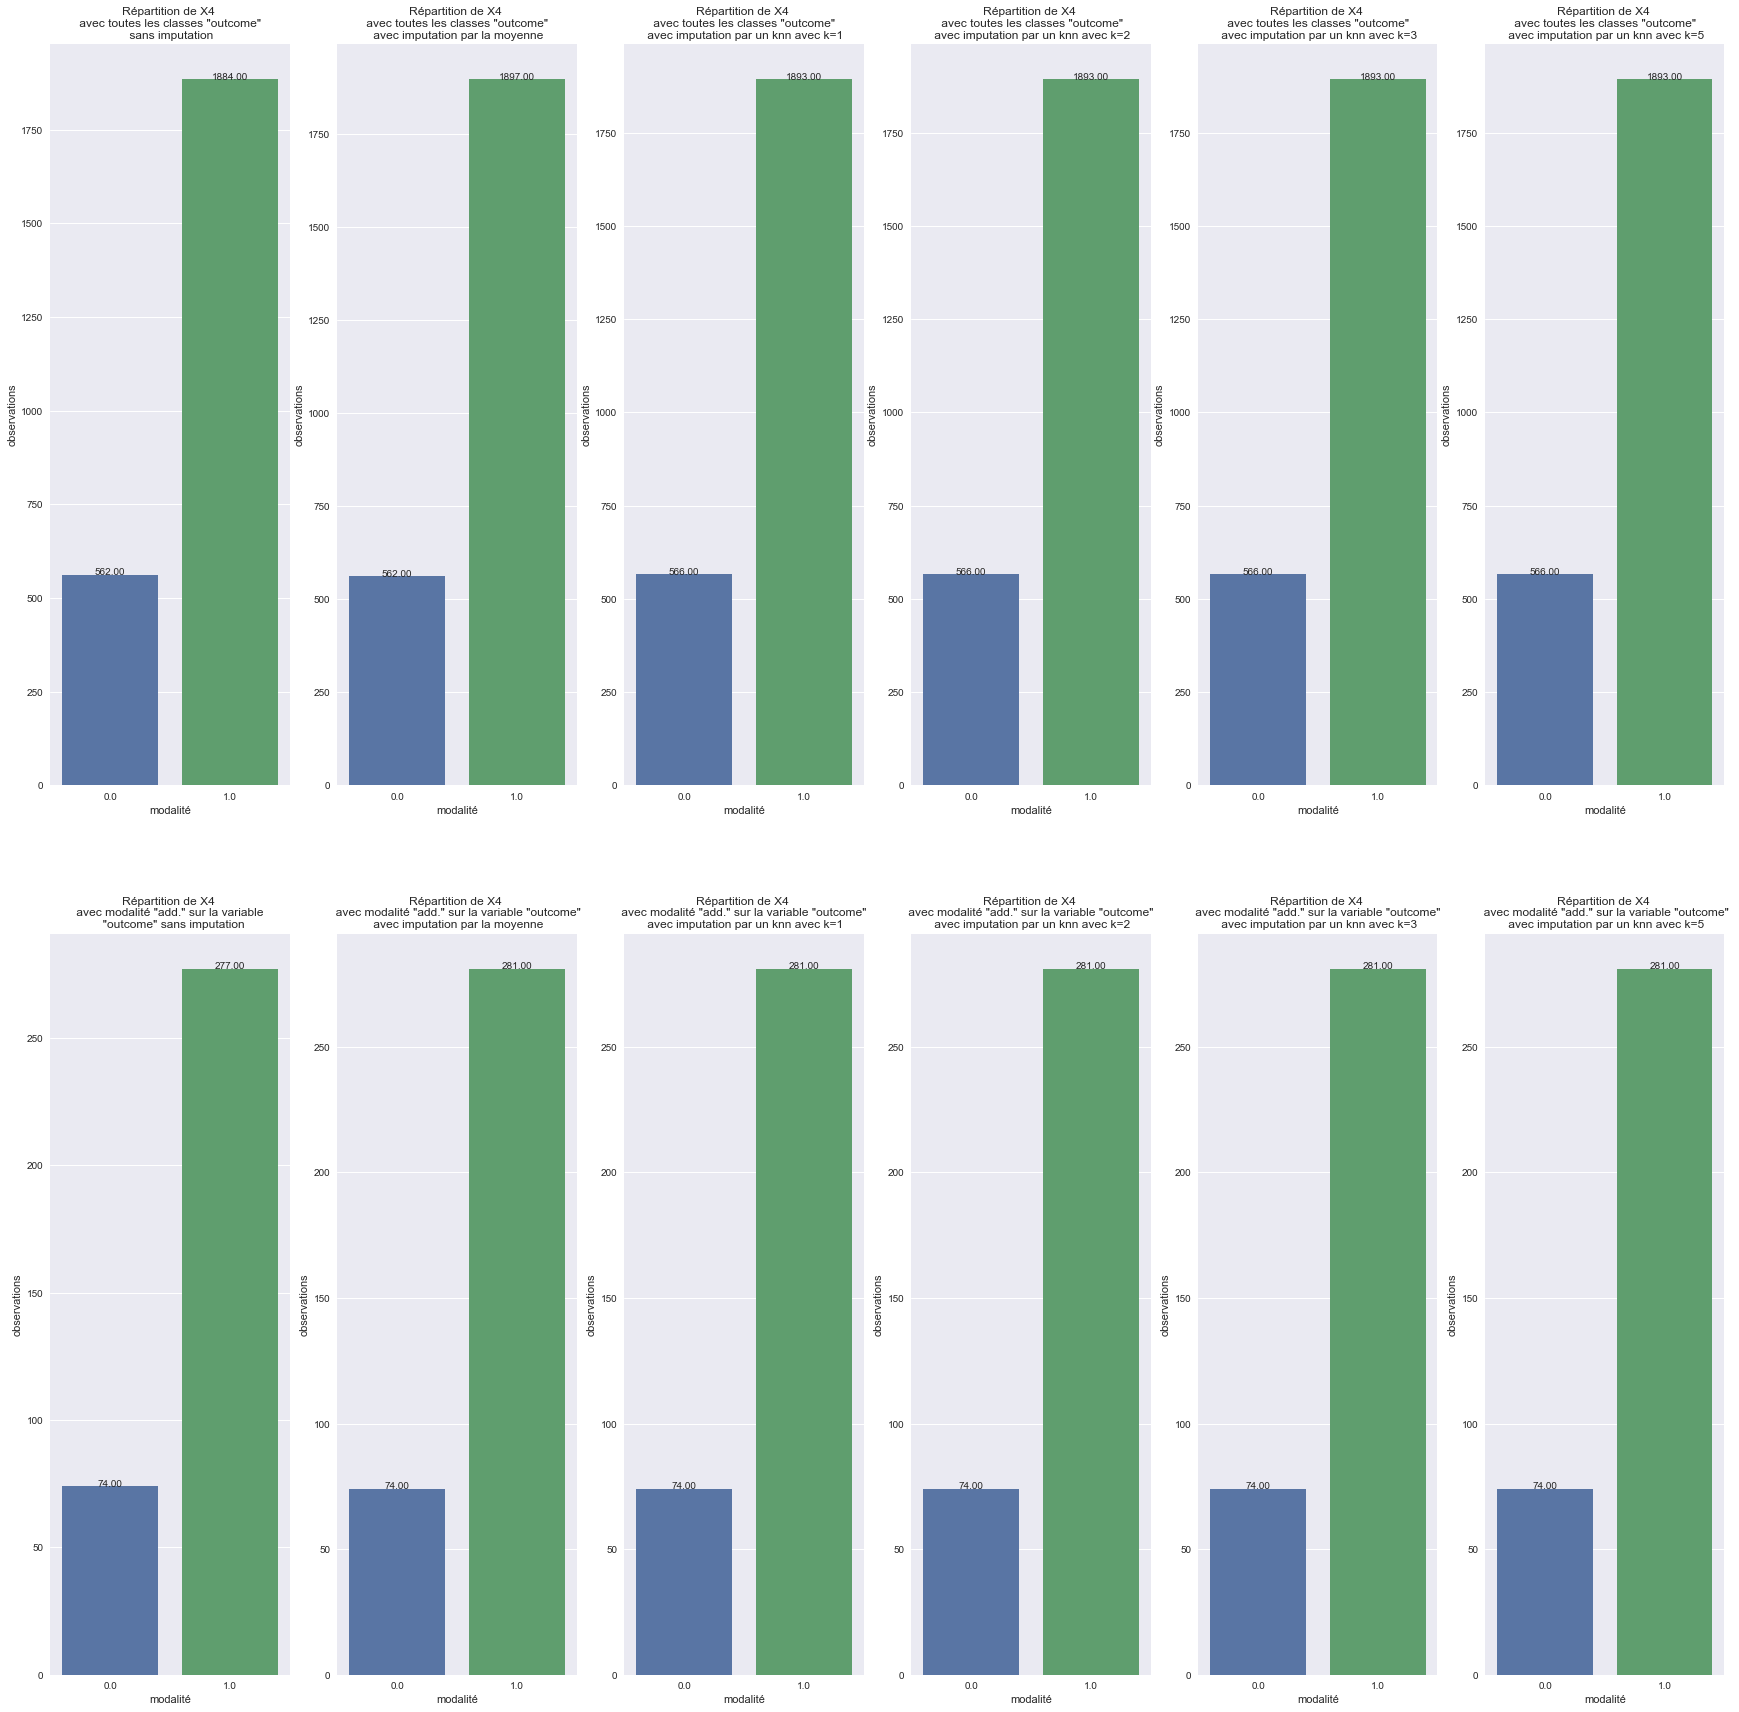

In [52]:
x4_by_outcome_original_all_outcome_x4 = pd.DataFrame(data.groupby(['X4'], as_index=False)['outcome'].agg('count'))
x4_by_outcome_original_all_outcome_x4.rename(columns={'X4':'modalité', 'outcome':'observations'}, inplace=True)
x4_by_outcome_original_all_outcome_x4.set_index('modalité', inplace=True)
x4_by_outcome_original_all_outcome_x4

x4_by_outcome_mean_all_outcome_x4 = pd.DataFrame(simple_imputed.groupby(['X4'], as_index=False)['outcome'].agg('count'))
x4_by_outcome_mean_all_outcome_x4.rename(columns={'X4':'modalité', 'outcome':'observations'}, inplace=True)
x4_by_outcome_mean_all_outcome_x4.set_index('modalité', inplace=True)
x4_by_outcome_mean_all_outcome_x4

x4_by_outcome_knn1_all_outcome_x4 = pd.DataFrame(knn_imputed_1.groupby(['X4'], as_index=False)['outcome'].agg('count'))
x4_by_outcome_knn1_all_outcome_x4.rename(columns={'X4':'modalité', 'outcome':'observations'}, inplace=True)
x4_by_outcome_knn1_all_outcome_x4.set_index('modalité', inplace=True)
x4_by_outcome_knn1_all_outcome_x4

x4_by_outcome_knn2_all_outcome_x4 = pd.DataFrame(knn_imputed_2.groupby(['X4'], as_index=False)['outcome'].agg('count'))
x4_by_outcome_knn2_all_outcome_x4.rename(columns={'X4':'modalité', 'outcome':'observations'}, inplace=True)
x4_by_outcome_knn2_all_outcome_x4.set_index('modalité', inplace=True)
x4_by_outcome_knn2_all_outcome_x4

x4_by_outcome_knn3_all_outcome_x4 = pd.DataFrame(knn_imputed_3.groupby(['X4'], as_index=False)['outcome'].agg('count'))
x4_by_outcome_knn3_all_outcome_x4.rename(columns={'X4':'modalité', 'outcome':'observations'}, inplace=True)
x4_by_outcome_knn3_all_outcome_x4.set_index('modalité', inplace=True)
x4_by_outcome_knn3_all_outcome_x4

x4_by_outcome_knn5_all_outcome_x4 = pd.DataFrame(knn_imputed_5.groupby(['X4'], as_index=False)['outcome'].agg('count'))
x4_by_outcome_knn5_all_outcome_x4.rename(columns={'X4':'modalité', 'outcome':'observations'}, inplace=True)
x4_by_outcome_knn5_all_outcome_x4.set_index('modalité', inplace=True)
x4_by_outcome_knn5_all_outcome_x4


x4_by_outcome_original_add_x4 = pd.DataFrame(data[data['outcome']=='ad.'].groupby(['X4'], as_index=False)['outcome'].agg('count'))
x4_by_outcome_original_add_x4.rename(columns={'X4':'modalité', 'outcome':'observations'}, inplace=True)
x4_by_outcome_original_add_x4.set_index('modalité', inplace=True)
x4_by_outcome_original_add_x4

x4_by_outcome_mean_add_x4 = pd.DataFrame(simple_imputed[simple_imputed['outcome']=='ad.'].groupby(['X4'], as_index=False)['outcome'].agg('count'))
x4_by_outcome_mean_add_x4.rename(columns={'X4':'modalité', 'outcome':'observations'}, inplace=True)
x4_by_outcome_mean_add_x4.set_index('modalité', inplace=True)
x4_by_outcome_mean_add_x4

x4_by_outcome_knn1_add_x4 = pd.DataFrame(knn_imputed_1[knn_imputed_1['outcome']=='ad.'].groupby(['X4'], as_index=False)['outcome'].agg('count'))
x4_by_outcome_knn1_add_x4.rename(columns={'X4':'modalité', 'outcome':'observations'}, inplace=True)
x4_by_outcome_knn1_add_x4.set_index('modalité', inplace=True)
x4_by_outcome_knn1_add_x4

x4_by_outcome_knn2_add_x4 = pd.DataFrame(knn_imputed_2[knn_imputed_2['outcome']=='ad.'].groupby(['X4'], as_index=False)['outcome'].agg('count'))
x4_by_outcome_knn2_add_x4.rename(columns={'X4':'modalité', 'outcome':'observations'}, inplace=True)
x4_by_outcome_knn2_add_x4.set_index('modalité', inplace=True)
x4_by_outcome_knn2_add_x4

x4_by_outcome_knn3_add_x4 = pd.DataFrame(knn_imputed_3[knn_imputed_3['outcome']=='ad.'].groupby(['X4'], as_index=False)['outcome'].agg('count'))
x4_by_outcome_knn3_add_x4.rename(columns={'X4':'modalité', 'outcome':'observations'}, inplace=True)
x4_by_outcome_knn3_add_x4.set_index('modalité', inplace=True)
x4_by_outcome_knn3_add_x4

x4_by_outcome_knn5_add_x4 = pd.DataFrame(knn_imputed_5[knn_imputed_5['outcome']=='ad.'].groupby(['X4'], as_index=False)['outcome'].agg('count'))
x4_by_outcome_knn5_add_x4.rename(columns={'X4':'modalité', 'outcome':'observations'}, inplace=True)
x4_by_outcome_knn5_add_x4.set_index('modalité', inplace=True)
x4_by_outcome_knn5_add_x4

fig, axes = plt.subplots(ncols=6, nrows=2, figsize=(30,30))
sns.barplot(ax=axes[0,0], data=x4_by_outcome_original_all_outcome_x4, x=x4_by_outcome_original_all_outcome_x4.index, y="observations")
for p in axes[0,0].patches:
    _x = p.get_x() + p.get_width() / 2
    _y = p.get_y() + p.get_height()
    value = '{:.2f}'.format(p.get_height())
    axes[0,0].text(_x, _y, value, ha="center")
axes[0,0].set_title('Répartition de X4 \n avec toutes les classes "outcome" \n sans imputation')

sns.barplot(ax=axes[0,1], data=x4_by_outcome_mean_all_outcome_x4, x=x4_by_outcome_mean_all_outcome_x4.index, y="observations")
for p in axes[0,1].patches:
    _x = p.get_x() + p.get_width() / 2
    _y = p.get_y() + p.get_height()
    value = '{:.2f}'.format(p.get_height())
    axes[0,1].text(_x, _y, value, ha="center")
axes[0,1].set_title('Répartition de X4 \n avec toutes les classes "outcome" \n avec imputation par la moyenne')

sns.barplot(ax=axes[0,2], data=x4_by_outcome_knn1_all_outcome_x4, x=x4_by_outcome_knn1_all_outcome_x4.index, y="observations")
for p in axes[0,2].patches:
    _x = p.get_x() + p.get_width() / 2
    _y = p.get_y() + p.get_height()
    value = '{:.2f}'.format(p.get_height())
    axes[0,2].text(_x, _y, value, ha="center")
axes[0,2].set_title('Répartition de X4 \n avec toutes les classes "outcome" \n avec imputation par un knn avec k=1')

sns.barplot(ax=axes[0,3], data=x4_by_outcome_knn2_all_outcome_x4, x=x4_by_outcome_knn2_all_outcome_x4.index, y="observations")
for p in axes[0,3].patches:
    _x = p.get_x() + p.get_width() / 2
    _y = p.get_y() + p.get_height()
    value = '{:.2f}'.format(p.get_height())
    axes[0,3].text(_x, _y, value, ha="center")
axes[0,3].set_title('Répartition de X4 \n avec toutes les classes "outcome"\n avec imputation par un knn avec k=2')

sns.barplot(ax=axes[0,4], data=x4_by_outcome_knn3_all_outcome_x4, x=x4_by_outcome_knn3_all_outcome_x4.index, y="observations")
for p in axes[0,4].patches:
    _x = p.get_x() + p.get_width() / 2
    _y = p.get_y() + p.get_height()
    value = '{:.2f}'.format(p.get_height())
    axes[0,4].text(_x, _y, value, ha="center")
axes[0,4].set_title('Répartition de X4 \n avec toutes les classes "outcome" \n avec imputation par un knn avec k=3')

sns.barplot(ax=axes[0,5], data=x4_by_outcome_knn5_all_outcome_x4, x=x4_by_outcome_knn5_all_outcome_x4.index, y="observations")
for p in axes[0,5].patches:
    _x = p.get_x() + p.get_width() / 2
    _y = p.get_y() + p.get_height()
    value = '{:.2f}'.format(p.get_height())
    axes[0,5].text(_x, _y, value, ha="center")
axes[0,5].set_title('Répartition de X4 \n avec toutes les classes "outcome" \n avec imputation par un knn avec k=5')

sns.barplot(ax=axes[1,0], data=x4_by_outcome_original_add_x4, x=x4_by_outcome_original_add_x4.index, y="observations")
for p in axes[1,0].patches:
    _x = p.get_x() + p.get_width() / 2
    _y = p.get_y() + p.get_height()
    value = '{:.2f}'.format(p.get_height())
    axes[1,0].text(_x, _y, value, ha="center")
axes[1,0].set_title('Répartition de X4 \n avec modalité "add." sur la variable \n  "outcome" sans imputation')

sns.barplot(ax=axes[1,1], data=x4_by_outcome_mean_add_x4, x=x4_by_outcome_mean_add_x4.index, y="observations")
for p in axes[1,1].patches:
    _x = p.get_x() + p.get_width() / 2
    _y = p.get_y() + p.get_height()
    value = '{:.2f}'.format(p.get_height())
    axes[1,1].text(_x, _y, value, ha="center")
axes[1,1].set_title('Répartition de X4 \n  avec modalité "add." sur la variable "outcome" \n avec imputation par la moyenne')

sns.barplot(ax=axes[1,2], data=x4_by_outcome_knn1_add_x4, x=x4_by_outcome_knn1_add_x4.index, y="observations")
for p in axes[1,2].patches:
    _x = p.get_x() + p.get_width() / 2
    _y = p.get_y() + p.get_height()
    value = '{:.2f}'.format(p.get_height())
    axes[1,2].text(_x, _y, value, ha="center")
axes[1,2].set_title('Répartition de X4 \n avec modalité "add." sur la variable "outcome" \n avec imputation par un knn avec k=1')

sns.barplot(ax=axes[1,3], data=x4_by_outcome_knn2_add_x4, x=x4_by_outcome_knn2_add_x4.index, y="observations")
for p in axes[1,3].patches:
    _x = p.get_x() + p.get_width() / 2
    _y = p.get_y() + p.get_height()
    value = '{:.2f}'.format(p.get_height())
    axes[1,3].text(_x, _y, value, ha="center")
axes[1,3].set_title('Répartition de X4 \n avec modalité "add." sur la variable "outcome" \n avec imputation par un knn avec k=2')

sns.barplot(ax=axes[1,4], data=x4_by_outcome_knn3_add_x4, x=x4_by_outcome_knn3_add_x4.index, y="observations")
for p in axes[1,4].patches:
    _x = p.get_x() + p.get_width() / 2
    _y = p.get_y() + p.get_height()
    value = '{:.2f}'.format(p.get_height())
    axes[1,4].text(_x, _y, value, ha="center")
axes[1,4].set_title('Répartition de X4 \n avec modalité "add." sur la variable "outcome" \n avec imputation par un knn avec k=3')

sns.barplot(ax=axes[1,5], data=x4_by_outcome_knn5_add_x4, x=x4_by_outcome_knn5_add_x4.index, y="observations")
for p in axes[1,5].patches:
    _x = p.get_x() + p.get_width() / 2
    _y = p.get_y() + p.get_height()
    value = '{:.2f}'.format(p.get_height())
    axes[1,5].text(_x, _y, value, ha="center")
axes[1,5].set_title('Répartition de X4 \n  avec modalité "add." sur la variable "outcome" \n avec imputation par un knn avec k=5')

plt.show()

Nous constatons que les résultats sont sensiblement identiques pour cette variable. Nous décidons donc de garder également une imputation avec k=3.

In [53]:
originals['X4'] = data['X4']
data['X4'] =  knn_imputed_3['X4']

### Méthodes factorielles pour la réduction des dimensions

Nous commençons par centrer / réduire les varibales quantitatives continues.

In [54]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_std= pd.DataFrame(scaler.fit_transform(data.loc[:,['X1', 'X2', 'X3']]), columns = data.loc[:,['X1', 'X2', 'X3']].columns, index = data.index)
X_std = pd.concat([X_std, data.iloc[:,3:-1]], axis=1)
y = data.iloc[:,-1]

print("Affichage des dix premières lignes des variables explicatives centrées réduites")
display(X_std.head(10))

Affichage des dix premières lignes des variables explicatives centrées réduites


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X1549,X1550,X1551,X1552,X1553,X1554,X1555,X1556,X1557,X1558
1,-0.621170,0.358572,0.596638,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-0.096404,2.145697,0.797891,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,-0.096404,2.145697,0.797891,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-0.115840,2.085626,0.797891,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,-0.096404,0.388608,-0.007120,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,-0.096404,2.145697,0.797891,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,-0.096404,2.145697,0.797891,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0.486669,-0.917946,-0.610879,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0.486669,-0.978017,-0.610879,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,0.486669,-0.917946,-0.610879,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Nous appliquons ensuite une ACP. Nous cherchons en premier lieu à déterminer le nombre de composantes principales nous permettant de conserver un maximum d'inertie. Pour ce faire nous réalisons une première ACP avec l'ensemble des varibales moins la variable réponse. Nous affichons ensuite l'ébouli des valeurs propres.

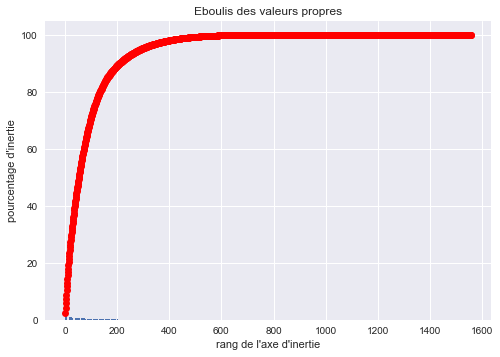

In [55]:
n_comp = len(X_std.iloc[:,:-1].columns)
    
import prince
pca= prince.PCA(
n_components= n_comp,
n_iter=3,
copy=True,
check_input=True,
engine='auto',
random_state=42)
pca = pca.fit(X_std)

def display_scree_plot(pca):
    scree = pca.explained_inertia_*100
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    plt.xlabel("rang de l'axe d'inertie")
    plt.ylabel("pourcentage d'inertie")
    plt.title("Eboulis des valeurs propres")
    plt.show(block=False)

display_scree_plot(pca)

 En regardant la figure, nous constatons que même les premières composantes  captent qu'une très faible inertie. Par contre une inflexion d'inertie cummulée est clairement visible autour des 200 premières composantes principales.
 
 Calculons le pourcentage d'inertie conservée avec ce seuil.

In [56]:
print(f"Pourcentage d'inertie conservée avec les 200 premières composantes principales {round(pca.explained_inertia_[0:200].sum()*100,2)}%")

Pourcentage d'inertie conservée avec les 200 premières composantes principales 89.24%


In [57]:
%%time

import prince
pca = prince.PCA(
n_components= 200,
n_iter=3,
copy=True,
check_input=True,
engine='auto',
random_state=42)
pca = pca.fit(X_std)

transformed_data = pca.transform(X_std)
print("Dix premières lignes des données explicatives transformées par l'ACP")
display(transformed_data.head(10))

Dix premières lignes des données explicatives transformées par l'ACP


,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
1,-0.762460,-0.274512,-0.396043,-0.954840,2.991010,0.543811,0.325614,3.583869,-2.447508,2.285572,...,-4.259279,1.710342,-1.123613,0.301305,-0.944310,1.795150,2.376858,-1.004728,2.441021,-0.521559
2,0.109160,0.373534,-0.077994,-1.354355,4.566384,1.053963,1.491418,3.889780,-2.396359,2.232990,...,2.743524,0.847325,1.954327,0.606823,0.311947,-4.456559,0.002677,1.452351,-2.481277,-1.678467
3,-0.808546,-0.465801,-0.398368,-1.413400,4.848219,1.096348,0.519634,4.260693,-2.742147,2.756066,...,2.392484,-0.524706,0.723183,-0.099593,1.128156,-1.191123,-1.525188,-0.001602,-1.464439,0.546403
4,-0.755208,-0.323408,-0.315253,-1.715833,5.809427,1.243629,0.477214,4.128127,-2.812214,3.061602,...,2.134804,-0.242741,1.231423,0.666548,0.766581,-0.846751,-2.126541,0.128777,-1.877533,0.892676
5,8.382406,17.419535,-0.650916,-0.020840,0.031908,-0.063911,2.015710,5.428790,-4.141955,-17.075706,...,-0.071774,-0.422391,0.666931,-2.484001,-2.205955,-2.086656,-1.215135,2.859970,1.976540,-0.462227
6,6.241846,15.401343,-0.834666,0.046680,-0.038666,0.010768,1.238223,4.518794,-3.661940,-13.950962,...,-0.897935,-1.073610,-0.916412,-1.501230,-1.708015,-2.122064,0.002466,0.388270,0.905633,-0.053541
7,6.537584,16.111183,-0.645084,0.058926,-0.043987,0.021447,1.245586,4.707243,-3.606985,-14.464579,...,-1.396487,-1.053045,-1.153106,-1.307939,-1.767712,-1.768251,-0.833050,-0.955996,1.450103,1.452936
8,-1.654992,-1.232156,-0.915788,-16.692859,67.275661,17.662784,-5.057918,-6.720225,2.745805,-1.479788,...,-0.389987,-0.250728,-0.162801,-0.293820,0.244608,-0.165991,0.076526,0.508874,0.396535,-0.161283
9,-1.671839,-1.253734,-0.944673,-16.938306,68.155024,17.881859,-4.878681,-6.260311,2.530874,-1.389707,...,3.000377,0.403136,1.439856,1.690537,-0.198442,-1.815404,-2.586818,0.401486,-1.993422,1.480862
10,-1.654116,-1.222748,-0.387391,-16.779374,67.637648,17.756742,-5.129916,-6.804293,2.780057,-1.495516,...,-0.213607,0.348745,0.021137,0.148160,0.459595,0.173044,0.131700,0.588148,0.312273,-0.123868


CPU times: user 2.12 s, sys: 591 ms, total: 2.71 s
Wall time: 618 ms


## Transformation numérique de la variable à prédire

Les modèles n'étant pas capables de gérer le formatage sous forme de chaînes de caractères des modalités "ad." et "noad.", nous transformons numériquement ces modalités (0: "nonad", 1: "ad.")

In [58]:
y = y.apply(lambda x: 0 if x == 'nonad.' else 1 )
print("Dix premières observations pour la variable y")
display(y.head(10))

Dix premières observations pour la variable y


1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
Name: outcome, dtype: int64

## Partitionnement du jeu de données en entre jeu d'entraînement et jeu de test

Nous allons utiliser 80% des données pour le jeu d'entraînement et 20% pour le jeu de test. Lors du partitionement nous appliquons également une stratification sur la variable réponse afin de garder la même répartition des classes.

In [59]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(transformed_data, y, test_size=0.2, stratify=y , random_state=42)

print(f"Nombre d'observations de X_train: {X_train.shape[0]}")
print(f"Nombre d'observations de X_test: {X_test.shape[0]}")
print(f"Nombre d'observations de y_train: {y_train.shape[0]}")
print(f"Nombre d'observations de y_train: {y_test.shape[0]}")

Nombre d'observations de X_train: 1967
Nombre d'observations de X_test: 492
Nombre d'observations de y_train: 1967
Nombre d'observations de y_train: 492


## Entraînement des modèles

Nous allons à présent entrainer les modèles suivants sur le jeu d'entrainement. Chaque entrainement sera réalisé avec une validation croisée sur 5 K-folds. 

- Baseline : prédiction par la classe majoritaire. Le choix de ce modèle permet d'observer une référence de performance minimale à atteindre en accord avec l'objectif de minimisation d'erreur de prédicion du challenge. 
- Regression logistique non pénalisée
- Pregressions logistiques ridge et lasso
- Arbre de décision
- Forêt aléatoire
- Extra trees
- Gradient boosting

A noter que les travaux de Nicholas Kushmeric ont été réalisé sur un modèle C4.5 d'arbre de décision. A noter également que lors de la réalisation de ses travaux, les modèles de forêts aléatoires et de gradient boosting étaient, au mieux, à l'état embrionaire de recherche. 

Afin de procéder à l'entrainement nous créons deux fonctions. 

La première print_metric permet d'afficher pour un modèle passé en paramètre plusieurs mesures de performances:

- le meilleur pramètre de seuil thêta
- le score AUROC
- la justesse ajustée (balanced accuracy)
- le rappel (recall)
- la précision (précision)
- le F1 score
- la matrice de confusion

Lors de la phase d'entraînement, hormis la justesse ajustée, tous les indicateurs sont donnés pour la classe majoriatire. La justesse ajustée est calculée sur une moyenne des deux classes.
La justesse ajustée à été retenue en lieu et place de l'indicateur de justesse "original" car le jeu de données est très déséquilibré sur les deux classes.

La seconde plot_roc_auc permet de comparer les courbe ROC de plusieurs modèles en les superposant.

Le choix du modèle retenu sera basé en premier lieu sur la justesse ajustée puis le score AUROC. Le premier indicateur étant celui qui se rapproche le plus de l'indicateur d'erreur de prédiction utilisé pour le challenge. 

In [60]:
from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score, f1_score, roc_auc_score, precision_score, recall_score, balanced_accuracy_score
from sklearn.model_selection import cross_val_score, cross_val_predict


def print_metrics(model, X, y, label='model name', best_estimator=False, best_theta=True):
   
    if best_estimator == True:
        pred = model.predict_proba(X)
    
    else:
        pred = cross_val_predict(model, X, y, method='predict_proba', cv=5, n_jobs=-1 ) 
    
    preds = [ p[1] for p in pred ]
    
    fpr, tpr, thresholds = metrics.roc_curve(y, preds)
    
    if best_theta == True:
        best_theta=thresholds[np.argmax(tpr - fpr)]
        
    print(f'Scores pour le modèle {label} :')
    if best_estimator == True:
        #print(model.best_estimator_)
        print(model)
    else:
        print(model)
        
    print('-----------------------------------------------------')
    print('Meilleur paramètre seuil thêta', best_theta)
    
    if best_estimator == True:
        print(metrics.classification_report(y, (np.array(preds) > best_theta).astype(int), zero_division=0))
        print('ROC score', metrics.roc_auc_score(y, preds))
        
    else: 
        for score in ["roc_auc", "balanced_accuracy", "recall", "precision", "f1"]:
            cvs = cross_val_score(model, X_train, y_train, scoring=score, cv=5, n_jobs=-1)
            print(f"{score} moyen par validation croisée : {cvs.mean()}, +/- {np.std(cvs):.3f}")
     
   
    
    m=metrics.confusion_matrix((np.array(preds) > best_theta).astype(int),y)
    p=np.round(np.divide(m, y.shape[0]) *100, 1)
    ax = sns.heatmap(p, annot=True, fmt='.1f', cbar=False, cmap="Blues", yticklabels=['nonad.','ad.'], xticklabels=['nonad.','ad.'])
    ax.set(xlabel='Etiquette', ylabel='Prediction')
    plt.show()
    
    
def plot_roc_auc(models, X, y, best_estimator=False):
    '''
    input:
    
    model: dict of models. keys correspond to names of models.
    y: array of y labels
    x: array of x labels
    
    '''
    fig = plt.figure(figsize=(9,9))
    plt.title('Courbes ROC')
    
    for name, model in models.items():
        if best_estimator == True:
            pred = model.predict_proba(X)
        else:
            pred = cross_val_predict(model, X, y,  method='predict_proba', cv=5, n_jobs=-1) 
            
        preds = [p[1] for p in pred]

        fpr, tpr, thresholds = metrics.roc_curve(y, preds)

        # Plot ROC curve
        plt.plot(fpr, tpr, label=f'{name}')
    
    plt.legend(loc='lower right')
    
    # Diagonal 45 degree line
    plt.plot([0,1], [0,1], 'k--')
    
    # Axes limits and labels
    plt.xlim([-0.1, 1.1])
    plt.ylim([-0.1, 1.1])
    plt.ylabel('Taux de vrai positifs')
    plt.xlabel('Taux de faux positif')
    plt.show()

### Modèle baseline 

Scores pour le modèle baseline :
DummyClassifier(strategy='most_frequent')
-----------------------------------------------------
Meilleur paramètre seuil thêta 1.0
roc_auc moyen par validation croisée : 0.5, +/- 0.000
balanced_accuracy moyen par validation croisée : 0.5, +/- 0.000
recall moyen par validation croisée : 0.0, +/- 0.000
precision moyen par validation croisée : 0.0, +/- 0.000
f1 moyen par validation croisée : 0.0, +/- 0.000


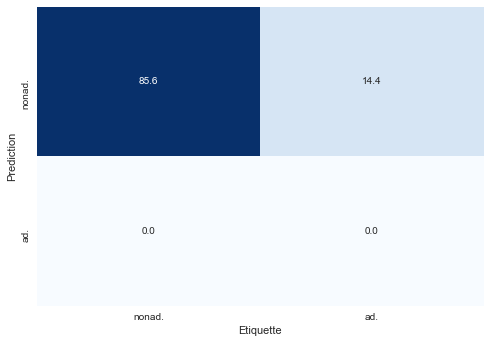

CPU times: user 247 ms, sys: 267 ms, total: 514 ms
Wall time: 5.33 s


In [61]:
%%time
from sklearn.dummy import DummyClassifier
models = {}
baseline =  DummyClassifier(strategy="most_frequent")
baseline.fit(X_train, y_train)
models['baseline'] = baseline
print_metrics(baseline, X=X_train, y=y_train, label='baseline')

Sans surprise, le modèle prédit systématiquement la classe majoritaire 'nonad.'. Tous les indicateurs de mesure liés à la classe 'ad.' sont donc à 0.

## Regression logistique non pénalisée

Scores pour le modèle lr :
LogisticRegression(penalty='none')
-----------------------------------------------------
Meilleur paramètre seuil thêta 0.25313150136333
roc_auc moyen par validation croisée : 0.9564794156508978, +/- 0.008
balanced_accuracy moyen par validation croisée : 0.9011666778221518, +/- 0.021
recall moyen par validation croisée : 0.8415413533834586, +/- 0.043
precision moyen par validation croisée : 0.7853441599204312, +/- 0.037
f1 moyen par validation croisée : 0.8113925513982044, +/- 0.028


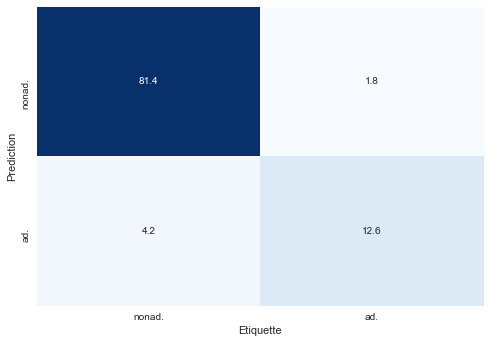

CPU times: user 553 ms, sys: 165 ms, total: 719 ms
Wall time: 2.43 s


In [62]:
%%time
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty='none')
lr.fit(X_train, y_train)
models['lr'] = lr
print_metrics(lr, X=X_train, y=y_train, label='lr')

Nous constatons que le modèle fait sensiblement mieux sur la justesse ajustée que le modèle baseline donnée pour le challenge (error rate 0.1168 soit une justesse de 88,32%).
Nous nous attendions à de moins bonnes performances sur ce modèles du à trois faits:
- Le déséquilibre des classes
- La présence de valeurs atypiques sur les variables continues
- Un nombre important de variables. Ce dernier point venant potentiellement minorer le précédent.

## Modèle de regression logistique Ridge

Scores pour le modèle ridge :
LogisticRegression(random_state=42)
-----------------------------------------------------
Meilleur paramètre seuil thêta 0.15297180384804562
roc_auc moyen par validation croisée : 0.9773420011452965, +/- 0.006
balanced_accuracy moyen par validation croisée : 0.9130180328417483, +/- 0.024
recall moyen par validation croisée : 0.8414786967418546, +/- 0.049
precision moyen par validation croisée : 0.903620628037104, +/- 0.039
f1 moyen par validation croisée : 0.8701441853160221, +/- 0.029


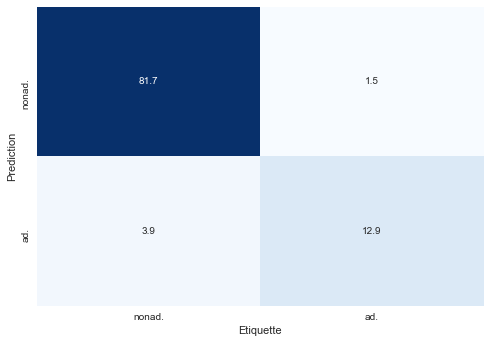

CPU times: user 480 ms, sys: 130 ms, total: 610 ms
Wall time: 2.26 s


In [63]:
%%time
from sklearn.linear_model import LogisticRegression
ridge = LogisticRegression(penalty='l2', random_state=42)
ridge.fit(X_train, y_train)
models['ridge'] = ridge
print_metrics(ridge, X=X_train, y=y_train, label='ridge')

Un modèle ridge pénalise l'ensemble des variables à partir d'un seuil de paramètre alpha.
D'après les résultats, ce modèle a un meilleur score AUROC et une meilleure justesse ajustée que le modèle de regression logistique non pénalisée.

En observant la matrice de confusions, nous constatons par contre que le modèle classe légèrement mieux les Vrai Négatif, Vrai positifs et légèrement moins bien les Faux Positif et Faux négatifs.

## Modèle de regression logistique Lasso

Scores pour le modèle lasso :
LogisticRegression(penalty='l1', random_state=42, solver='saga')
-----------------------------------------------------
Meilleur paramètre seuil thêta 0.2506139696744109
roc_auc moyen par validation croisée : 0.9789099355708757, +/- 0.006
balanced_accuracy moyen par validation croisée : 0.9116133248551644, +/- 0.020
recall moyen par validation croisée : 0.830952380952381, +/- 0.040
precision moyen par validation croisée : 0.9486412940417945, +/- 0.027
f1 moyen par validation croisée : 0.8852545333127857, +/- 0.026


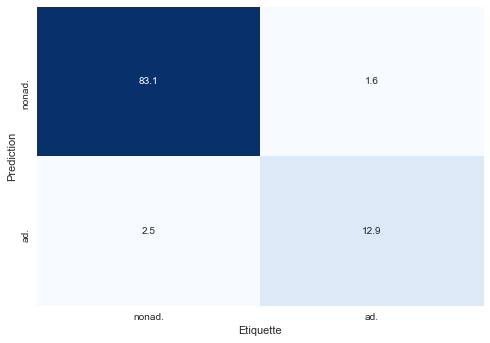

CPU times: user 740 ms, sys: 49.4 ms, total: 789 ms
Wall time: 5.62 s


In [64]:
%%time
from sklearn.linear_model import LogisticRegression
lasso = LogisticRegression(penalty='l1',random_state=42, solver='saga')
lasso.fit(X_train, y_train)
models['lasso'] = lasso
print_metrics(lasso, X=X_train, y=y_train, label='lasso')

Un modèle Lasso a tendance à "supprimer" (en mettant à zéro) certaines variables à partir d'un certain seuil du paramètre de pénalisation alpha.
Le modèle lasso à un meilleur score AUROC que les deux précédents modèles mais une justesse ajustée légèrement moins bonne que le modèle ridge.

D'après la matrice de confusions nous constatons également qu'il fait moins bien que le modèle Ridge sur la classe négative ("nonad."). Ce qui reflète la remarque faite sur la justesse ajustée du modèle.

## Arbre de décision

Scores pour le modèle arbre_decision :
DecisionTreeClassifier(random_state=42)
-----------------------------------------------------
Meilleur paramètre seuil thêta 1.0
roc_auc moyen par validation croisée : 0.8916249265597227, +/- 0.019
balanced_accuracy moyen par validation croisée : 0.8914304027873838, +/- 0.018
recall moyen par validation croisée : 0.8203007518796992, +/- 0.038
precision moyen par validation croisée : 0.7888068650765387, +/- 0.035
f1 moyen par validation croisée : 0.8033781182168427, +/- 0.026


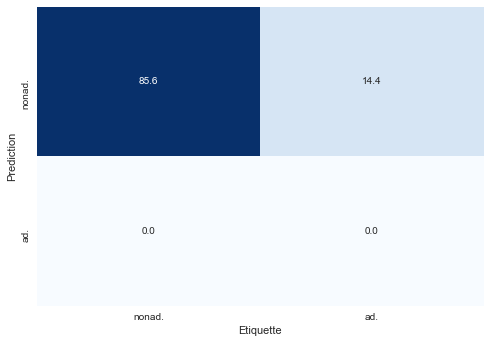

CPU times: user 785 ms, sys: 54.3 ms, total: 839 ms
Wall time: 5.7 s


In [65]:
%%time
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
models['abrbre_decision'] = dt
print_metrics(dt, X=X_train, y=y_train, label='arbre_decision')

Sur la seule base des indicateurs, l'arbre de décision est le moins bon modèle jusqu'à présent. Nous notons sur la matrice de confusions qu'il a prédit systématiquement la classe majoritaire ('nonad.'). 

## Forêt aléatoire

Scores pour le modèle foret_aleatoire :
RandomForestClassifier(random_state=42)
-----------------------------------------------------
Meilleur paramètre seuil thêta 0.21
roc_auc moyen par validation croisée : 0.9736514722761405, +/- 0.009
balanced_accuracy moyen par validation croisée : 0.9171445397618676, +/- 0.024
recall moyen par validation croisée : 0.8414160401002506, +/- 0.049
precision moyen par validation croisée : 0.9535171551137938, +/- 0.032
f1 moyen par validation croisée : 0.8927625953945328, +/- 0.028


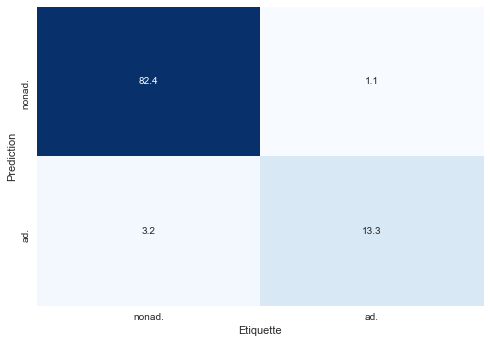

CPU times: user 2.02 s, sys: 82.4 ms, total: 2.1 s
Wall time: 16.2 s


In [66]:
%%time
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
models['foret_aleatoire'] = rf
print_metrics(rf, X=X_train, y=y_train, label='foret_aleatoire')

L'agrégation de multiples arbres de décision dans une forêt aléaloitre, de par la combinaison de leur frontières de décision devrait donner de meilleurs résultats. C'est bien le cas ici. 
In fine le modèle offre la meilleure justesse ajustée jusqu'à présent. Par contre son ROC AUC score est légèrement moins bon que le modèle ridge.

En observant la matrice de confusions nous remarquons que la forêt aléatoire fait mieux que le modèle ridge sur les Vrai Positifs et Vrai Négatifs et moins bien sur les Faux positifs et Faux Négatifs. Ce qui reflète ce que nous avons constaté sur l'indicateur de justesse ajustée.

## Extra-trees

Scores pour le modèle extra_trees :
ExtraTreesClassifier(random_state=42)
-----------------------------------------------------
Meilleur paramètre seuil thêta 0.24
roc_auc moyen par validation croisée : 0.9728977178356375, +/- 0.006
balanced_accuracy moyen par validation croisée : 0.8956698589946678, +/- 0.024
recall moyen par validation croisée : 0.7990601503759398, +/- 0.049
precision moyen par validation croisée : 0.9464854766982427, +/- 0.026
f1 moyen par validation croisée : 0.8655892454370597, +/- 0.031


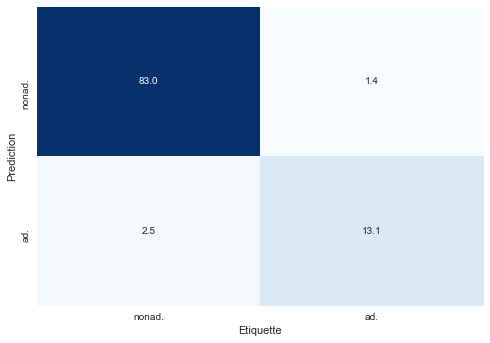

CPU times: user 781 ms, sys: 71.7 ms, total: 853 ms
Wall time: 7.82 s


In [67]:
%%time
from sklearn.ensemble import ExtraTreesClassifier
et = ExtraTreesClassifier(random_state=42)
et.fit(X_train, y_train)
models['extra_trees'] = et
print_metrics(et, X=X_train, y=y_train, label='extra_trees')

L'extra trees part du même principe que la forêt aléatoire à ceci près que les noeuds ont un seuil de coupe tiré aléatoirement, alors que les forêts aléatoire les sélectionnent afin de maximiser l'indice de pureté. 
D'après les résultats, les indicateurs de performance sont moins bons que ceux de la forêt aléatoire. D'après la matrice de confusions, l'extra trees fait moins bien sur la classe minoritaire ("ad.") et mieux sur la classe majoritaire ("nonad.").

## Gradient boosting

Scores pour le modèle gradient_boosting :
GradientBoostingClassifier(random_state=42)
-----------------------------------------------------
Meilleur paramètre seuil thêta 0.06329633756341614
roc_auc moyen par validation croisée : 0.9727736440507797, +/- 0.008
balanced_accuracy moyen par validation croisée : 0.9135523805805313, +/- 0.029
recall moyen par validation croisée : 0.8449248120300752, +/- 0.055
precision moyen par validation croisée : 0.8895045049032408, +/- 0.045
f1 moyen par validation croisée : 0.8658701209439521, +/- 0.044


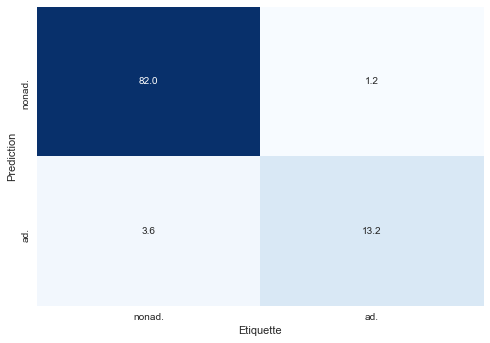

CPU times: user 11.1 s, sys: 638 ms, total: 11.8 s
Wall time: 1min 25s


In [68]:
%%time
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)
models['gradient_boosting'] = gb
print_metrics(gb, X=X_train, y=y_train, label='gradient_boosting')

Le modèle de gradient boosting a de moins bons indicateurs que la forêt aléatoire. 
D'après la matrice de confusions, le modèle détecte plus de Faux Positifs et Faux Négatifs et moins de Vrai Positifs et vrai négatifs que la forêt aléatoire. 

Vraissemblablement la forêt aléatoire offre les meilleures performances sur tous les indicateurs. En sortie de cross validation, scikit-learn réalise automatiquement le réentrainement des modèles sur l'ensemble des données d'entraînement. Nous cherchons a présent à optimiser plusieurs paramètres de la forêt aléatoire:
- Profondeur du modèle
- Nombre minimum d'observations par feuilles
- Nombre minimum d'observations par noeuds
- Nombre d'estimateurs

## Optimisation des paramètres

Avant de réaliser des recherches de paramètres sur grille nous souhaitons en premier lieu fixer la profondeur des arbres la forêt aléatoire. Pour se faire, nous observons la courbe de validation avec une cross validation de 5 k-folds sur les données d'apprentissage. 

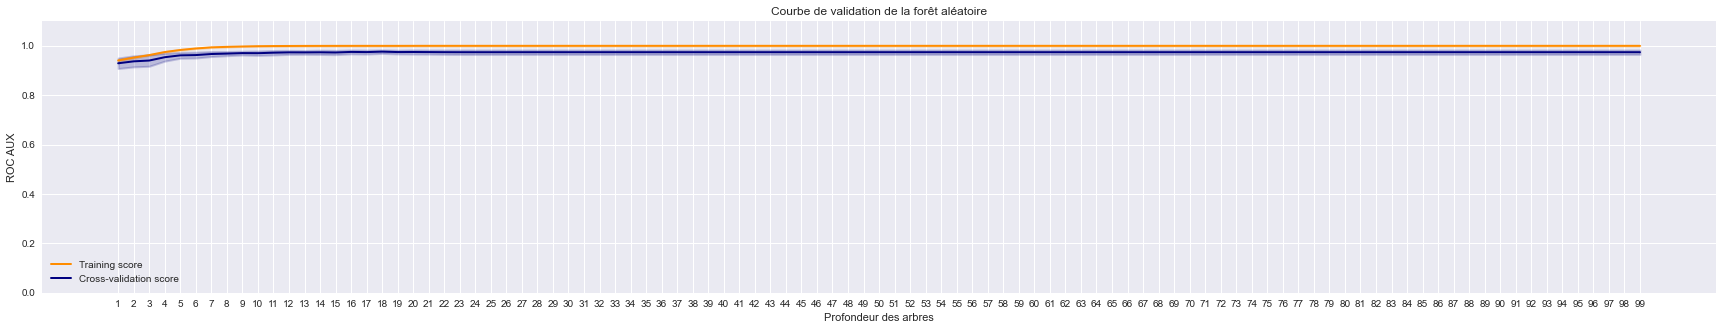

CPU times: user 3.07 s, sys: 658 ms, total: 3.73 s
Wall time: 5min 7s


In [254]:
%%time
from sklearn.model_selection import validation_curve

param_range = np.arange(1,100,1)
train_scores, test_scores = validation_curve(
                                RandomForestClassifier(random_state=42),
                                X = X_train, y = y_train, 
                                param_name = 'max_depth', 
                                param_range = param_range,
                                scoring = 'roc_auc',
                                cv = 5,
                                n_jobs=-1)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)


plt.figure(figsize=((30,5)))
plt.title("Courbe de validation de la forêt aléatoire")
plt.xlabel("Profondeur des arbres")
plt.ylabel("ROC AUX")
plt.ylim(0.0, 1.1)
lw = 2
plt.plot(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.plot(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.xticks(param_range)
plt.legend(loc="best")
plt.show()

Les seules variations du score AUROC étant entre 0.8 et 1, nous zoomons sur cette plage de valeurs.

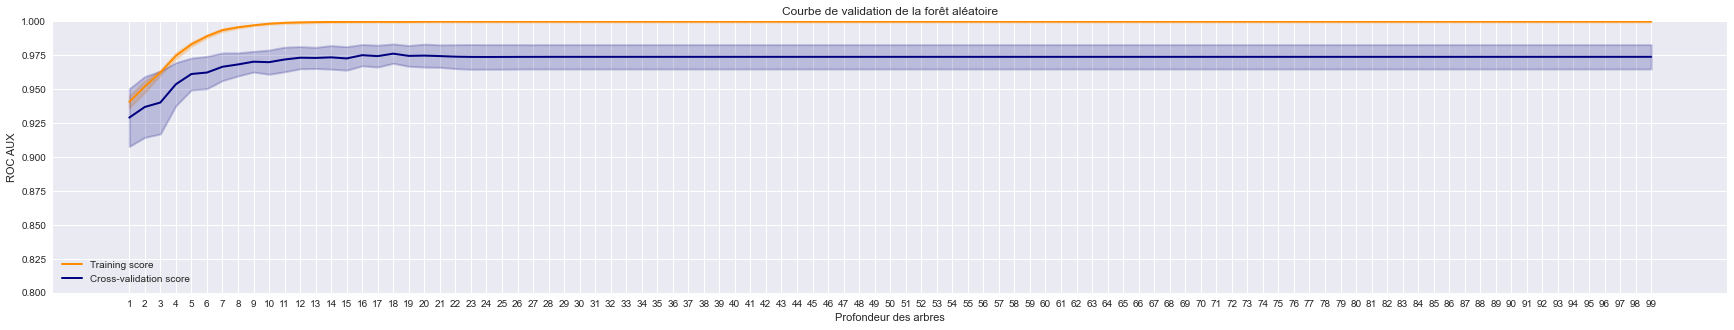

In [255]:
plt.figure(figsize=((30,5)))
plt.title("Courbe de validation de la forêt aléatoire")
plt.xlabel("Profondeur des arbres")
plt.ylabel("ROC AUX")
plt.ylim(0.8,1)
lw = 2
plt.plot(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.plot(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.xticks(param_range)
plt.legend(loc="best")
plt.show()

Nous constatons que l'indicateur atteint son maximum à une profondeur de 18. A partir ce là nous réalisons une première recherche sur grille aléatoire avec tirage de 100 combinaisons. 

Afin tester encore la profondeur autour de la valeur 18, nous indiquons deux autres valeurs proches dans la liste de valeurs de profondeur testables. Sur les deux paramètres de minimum d'observations par feuilles et par noeuds nous soumettons des valeurs sur un esapce restreint de paramètres. Nous avons la démarche contraire sur le nombre d'estimateurs.

Score pour le modèle optimized_rf :
RandomForestClassifier(max_depth=20, n_estimators=1000, random_state=42)
-----------------------------------------------------
Meilleur paramètre seuil Tetha 0.512016708694264
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1683
           1       1.00      0.99      1.00       284

    accuracy                           1.00      1967
   macro avg       1.00      1.00      1.00      1967
weighted avg       1.00      1.00      1.00      1967

ROC score 0.9994298829220122


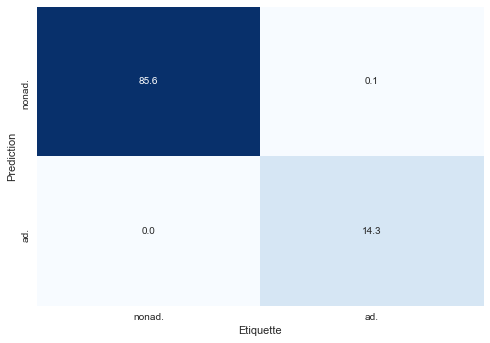

CPU times: user 25.2 s, sys: 1.84 s, total: 27 s
Wall time: 57min 31s


In [256]:
%%time
from sklearn.model_selection import RandomizedSearchCV
optimized_rf = RandomForestClassifier(random_state=42)
params = {
          'max_depth': [14,18,20],
          'min_samples_leaf': [1, 2, 3,  4, 5, 6],
          'min_samples_split': [2, 4, 5, 6, 8, 10],
          'n_estimators' : [200, 400, 600, 800, 1000, 1200, 1600, 1800, 2000]
               }

model = RandomizedSearchCV(
                            estimator=optimized_rf,
                            n_iter = 100,
                            param_distributions=params,
                            scoring = ["roc_auc", "balanced_accuracy"],
                            refit = "roc_auc",
                            cv=5,
                            n_jobs = -1
                            )
model.fit(X_train, y_train)
print_metrics(model, X=X_train, y=y_train, label='optimized_rf',best_estimator=True)

In [257]:
model.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_depth': 20}

Sur les paramètres du nombre d'observation minimum par feuilles et le nombre d'observateurs maximum par feuilles, l'algorithme a sélectionné les paramètres par défaut (1 pour le premier et 2 pour le second). Le nombre d'estimateurs optimal retenu est de 1000 et la profondeur optimale retenue est 20.

Nous constatons que les indicateurs de performance sont à 100% hormis pour le recall sur la classe minoritaire ("add."). Attention des indicateurs de ce niveaux peuvent être synonymes de sur-apprentissage. Nous procédons à présent à une second recherche sur grille qui sera elle systématique sur l'ensemble des paramètres à tester. 

Nous fixons la profondeur à 20 .Pour le minimum de d'observations par feuilles et noeuds nous soumettons tout de même deux autres valeurs supérieurs à celles par défaut. Pour le nombre d'estimateurs, nous testons une échelle de valeurs autours de 1000 avec un pas de 100.

Score pour le modèle optimized_rf :
RandomForestClassifier(max_depth=20, n_estimators=1000, random_state=42)
-----------------------------------------------------
Meilleur paramètre seuil Tetha 0.512016708694264
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1683
           1       1.00      0.99      1.00       284

    accuracy                           1.00      1967
   macro avg       1.00      1.00      1.00      1967
weighted avg       1.00      1.00      1.00      1967

ROC score 0.9994298829220122


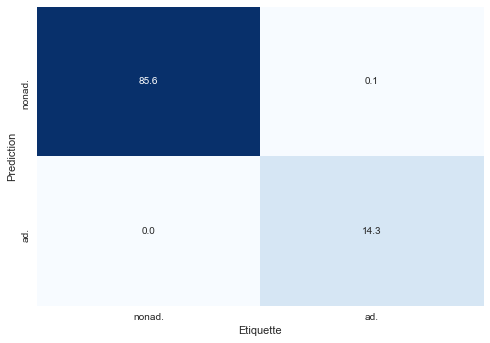

CPU times: user 22.5 s, sys: 1.08 s, total: 23.6 s
Wall time: 25min 22s


In [258]:
%%time
from sklearn.model_selection import GridSearchCV
optimized_rf = RandomForestClassifier(random_state=42, max_depth=20)
params = {
          'min_samples_leaf': [1, 2, 3],
          'min_samples_split': [2, 4, 6],
          'n_estimators' : [800, 900, 1000, 1100, 1200]
               }

model = GridSearchCV(
                    estimator=optimized_rf,
                    param_grid=params,
                    scoring = ["roc_auc", "balanced_accuracy"],
                    refit = "roc_auc",
                    cv=5,
                    n_jobs = -1
                    )
model.fit(X_train, y_train)
models['optimized_rf'] = model.best_estimator_
print_metrics(model, X=X_train, y=y_train, label='optimized_rf',best_estimator=True)

La seconde recherche de paramètres sur grille retourne exactement le mêmes paramètres optimaux, soit:
- Prodondeur: 20
- Nombre minimum d'observations par feuille : 1
- Nombre minimum d'observations par noeud : 2
- Nombre d'estimateurs : 1000

A noter que le meilleur paramètre de seuil thêta pour séparer la classe négative de la classe positive est de 0.512.


Nons continuons en affichant les courbe roc de l'ensemble des modèles en incluant la version optimisée de la forêt aléatoire.

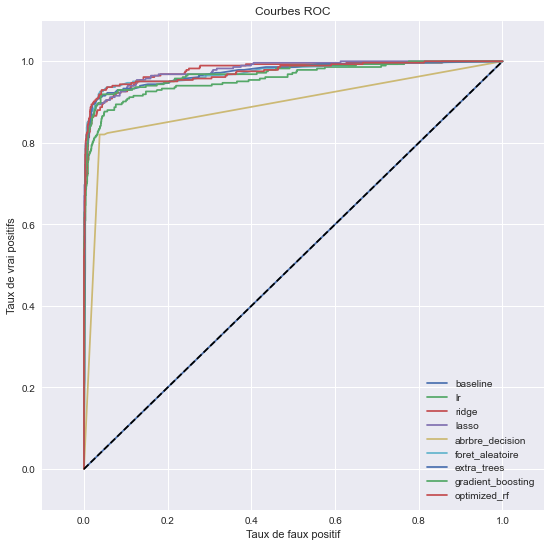

In [259]:
plot_roc_auc(models, X_train, y_train, best_estimator=False)

Le modèle optimisé (optimized_rf) est bien celui avec la courbe offrant l'aire la plus grande.

Afin de vérifier que le modèle ne sur-ajuste pas, nous testons ses performance avec les données partiionnées qui n'ont pas servi à l'entraînement et l'optimisation.  

Score pour le modèle optimized_rf :
RandomForestClassifier(max_depth=20, n_estimators=1000, random_state=42)
-----------------------------------------------------
Meilleur paramètre seuil Tetha 0.30591827329146937
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       421
           1       0.87      0.87      0.87        71

    accuracy                           0.96       492
   macro avg       0.93      0.93      0.93       492
weighted avg       0.96      0.96      0.96       492

ROC score 0.9701582416111875


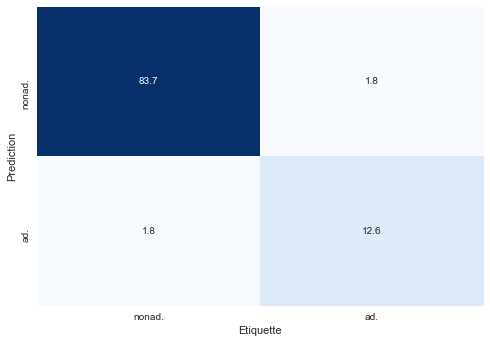

In [262]:
print_metrics(models['optimized_rf'], X=X_test, y=y_test, label='optimized_rf',best_estimator=True)

À la lecture des résultats, nous constatons une jutesse du modèle à 96% soit un taux d'erreur de 4%. Nous voyons que les indicateurs sont globalement meilleurs sur la classe majoritaire ("nonad."). 

Visualisons la courbe ROC sur les données qui n'ont pas ervi à l'apprentissage.

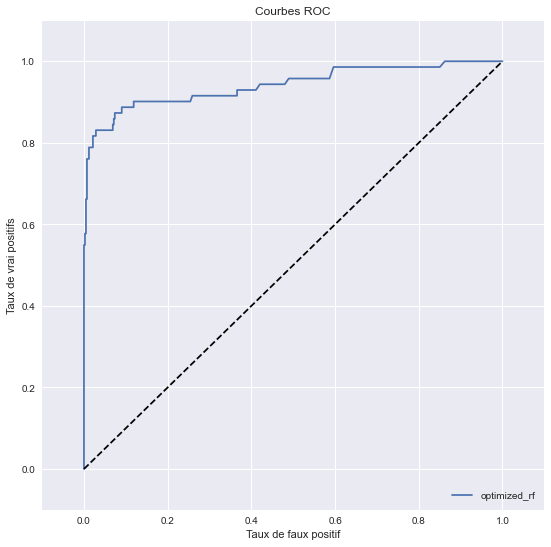

In [263]:
final_model =  {}
final_model['optimized_rf'] = models['optimized_rf']
plot_roc_auc(final_model, X_test, y_test, best_estimator=False)

## Rentrainement du model optimizé sur toutes les données d'entrainement mises à dispositiomise à disposition pour le challenge

In fine nous réentrainons la forêt aléatoire optimizée sur toutes les donnée qui ont servi au modèle et sauvegargons ce dernier. 

In [22]:
import pickle
models['optimized_rf'].fit(transformed_data, y)
filename = 'modele_final.sav'
pickle.dump(models['optimized_rf'], open(filename, 'wb'))
pickle.load(open(filename, 'rb'))
loaded_model = pickle.load(open(filename, 'rb'))

## Prédictions sur le jeu de test

Enfin nous réalisons les prétraitements sur les données de tests du challenge puis la prédiction. Les données sont sauvegardées dans un fichier csv à la fin de l'opération.

In [28]:
data_test = pd.read_csv('data_test.csv', sep='\t')

data_test_copy = data_test.select_dtypes(['int','float']).copy()

knn_imputer_3 =  KNNImputer(weights="distance", n_neighbors=3,copy=False)
knn_imputer_3.fit(data_copy)
imputed_test_knn = pd.DataFrame(np.round_(knn_imputer_3.transform(data_test_copy)),columns=data_test_copy.columns, index=data_test_copy.index)


data_test['X1'] = imputed_test_knn['X1']
data_test['X2'] = imputed_test_knn['X2']
data_test['X3'] =  np.round_((data_test['X2'] / data_test['X1']),0)
data_test['X4'] = imputed_test_knn['X4']

scaler.fit(data.loc[:,['X1', 'X2', 'X3']])

X_final_test_std= pd.DataFrame(scaler.transform(data_test.loc[:,['X1', 'X2', 'X3']]), columns = data_test.loc[:,['X1', 'X2', 'X3']].columns, index = data_test.index)
X_final_test_std = pd.concat([X_final_test_std, data_test.iloc[:,3:]], axis=1)

X_final_test_transformed = pca.transform(X_final_test_std)

y_final_test =  pd.Series(loaded_model.predict(X_final_test_transformed), index=X_final_test_transformed.index)

y_final_test_outcome = y_final_test.map({0:'nonad.', 1:'ad.'})

y_final_test_outcome =  pd.DataFrame(y_final_test_outcome, columns=['pred'])
y_final_test_outcome.reset_index(inplace=True, drop=True)

print("Dix première observations de la prédiction sur le jeu de test du challenge")
display(y_final_test_outcome.head(20))


print(f"Proportions des classes dans les prédiction")
display(y_final_test_outcome.value_counts())
y_final_test_outcome.to_csv('LeSoSi_pred.csv', index=False, header=False)

Dix première observations de la prédiction sur le jeu de test du challenge


,pred
0,ad.
1,ad.
2,ad.
3,ad.
4,ad.
5,ad.
6,ad.
7,ad.
8,ad.
9,ad.


Proportions des classes dans les prédiction


pred  
nonad.    723
ad.        97
dtype: int64